In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from pathlib import Path
import seaborn as sns
import numpy as np
sns.set_context('talk')
sns.set_style('darkgrid')


In [2]:
version = '3.0'
version_folder = 'three'


In [3]:
def binarize_labels(df):
    df.iloc[:, :3] = df.iloc[:, :3].round()
    return df

In [4]:
dfs = []
for p in Path('annot_round1').glob('*/batch*.tsv'):
# for p in Path('annot_round1').glob('deu_Latn/batch*.tsv'):
    df = pd.read_csv(p, sep='\t') 
    # if p.parent.name == 'deu_Latn' and p.name == 'batch0.tsv':        
    #     print('Binarization for', p)
    #     df = binarize_labels(df)
    # elif p.parent.name == 'gla_Latn' and p.name == 'batch0.tsv':
    #     # Laurie didn't explicitly labeled if the language was not correct        
    #     print('For gla_Latn empty "lang correct" means incorrect lang')        
    #     df.iloc[:,2] = df.iloc[:,2].fillna(0)
 
    df = df.rename(columns = {c: c.split('?')[0] for c in df.columns})
    if any(df[c].isnull().all() for c in df.columns if 'lang' in c):
        continue
    print(p, (~df['lang correct'].isnull()).sum(), 
          *(df[c].value_counts(dropna=False).to_dict() for c in ['lang correct', 'porn', 'text artifacts','unnatural']))
    assert len(df.columns)==6, df.columns
    df['path'] = str(p)
    df['lang'] = p.parent.name
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True).sort_values(by='lang')

for i in df.columns[:4]:
    print(i, df[i].value_counts(dropna=False).to_dict())
print(df.lang.nunique(), 'languages')
df.sample(10)

annot_round1/ell_Grek/batch4.tsv 199 {1.0: 198, nan: 1, 0.0: 1} {nan: 197, 1.0: 3} {nan: 138, 1.0: 62} {nan: 192, 1.0: 7, 2.0: 1}
annot_round1/ell_Grek/batch2.tsv 196 {1.0: 194, nan: 4, 11.0: 2} {nan: 199, 1.0: 1} {nan: 138, 1.0: 62} {nan: 195, 1.0: 5}
annot_round1/ell_Grek/batch3.tsv 200 {1: 199, 0: 1} {nan: 200} {nan: 131, 1.0: 69} {nan: 190, 1.0: 10}
annot_round1/ell_Grek/batch1.tsv 194 {1.0: 193, nan: 6, 0.0: 1} {nan: 200} {nan: 137, 1.0: 63} {nan: 196, 1.0: 4}
annot_round1/ell_Grek/batch0.tsv 198 {1.0: 197, nan: 2, 0.0: 1} {nan: 200} {nan: 112, 1.0: 88} {nan: 187, 1.0: 12, 0.0: 1}
annot_round1/fin_Latn/batch2.tsv 200 {1: 198, 0: 2} {nan: 198, 1.0: 2} {nan: 187, 1.0: 13} {nan: 186, 1.0: 14}
annot_round1/fin_Latn/batch3.tsv 200 {1: 200} {nan: 193, 1.0: 7} {nan: 173, 1.0: 27} {nan: 190, 1.0: 10}
annot_round1/fin_Latn/batch1.tsv 199 {1.0: 199, nan: 1} {nan: 194, 1.0: 6} {nan: 143, 1.0: 57} {nan: 177, 1.0: 23}
annot_round1/fin_Latn/batch0.tsv 199 {'1': 198, nan: 1, "'": 1} {nan: 189, 1

porn text artifacts  unnatural lang correct  \
5306   NaN            NaN        NaN          NaN   
627    NaN            NaN        NaN          1.0   
550    NaN            NaN        NaN            1   
3455   NaN            NaN        NaN            1   
5121   NaN            NaN        NaN            1   
1172   NaN            NaN        NaN            1   
1782   NaN            NaN        NaN            1   
2095   NaN            NaN        NaN          1.0   
223    NaN            NaN        NaN          1.0   
896    NaN            1.0        NaN          1.0   

                                              text_show  \
5306  Брнабићeва: Без памћења свих наших битака неће...   
627   Χρειάζομαι πολλά χρήματα πριν μετακομίσω;\nΗ μ...   
550   «Σε δραματικό αδιέξοδο οδηγεί η κυβερνητική μν...   
3455  El director asturianu Roberto F. Canuto y el c...   
5121  É praticamente impossível andar por Roma e não...   
1172  Sain kesäisellä mökkivisiitillä suorittaakseni...   
1782  Transilvanian unkarilaisten kansanpukuja – esi...   
2095  Mnogi se pitaju zašto brand Giorgio Armani ima...   
223   Η εταιρεία Coca-Cola, στο Βέλγιο απέσυρε 700.0...   
896   Η 35χρονη ιδιοφυΐα Μίρα Μουράτι από την Αλβανί...   

                                    id                              path  \
5306  f62fd22de51922066587e19fd086ffc9  annot_round1/srp_Cyrl/batch0.tsv   
627   7da06d262db8aacc6cbf01764844e587  annot_round1/ell_Grek/batch1.tsv   
550   bd6217ab0646dd4fe8e96eafaa5e2113  annot_round1/ell_Grek/batch3.tsv   
3455  41637160bc308f771f422f8958829577  annot_round1/ast_Latn/batch0.tsv   
5121  2b6ed5244792521bea5756b1539c891e  annot_round1/por_Latn/batch0.tsv   
1172  b902e139547a45e09986450a8851a437  annot_round1/fin_Latn/batch2.tsv   
1782  ac45888ba9deb36f22f6e2a24943ef37  annot_round1/fin_Latn/batch0.tsv   
2095  bf3795701c547bddb4d46a8286b32d0e  annot_round1/hrv_Latn/batch1.tsv   
223   43d16c32fc2d4d4cf1ab00bbe2cc461f  annot_round1/ell_Grek/batch2.tsv   
896   7fad3b3b2bf70f6d83328e7034851bdf  annot_round1/ell_Grek/batch0.tsv   

          lang  
5306  srp_Cyrl  
627   ell_Grek  
550   ell_Grek  
3455  ast_Latn  
5121  por_Latn  
1172  fin_Latn  
1782  fin_Latn  
2095  hrv_Latn  
223   ell_Grek  
896   ell_Grek

In [5]:
df[df['lang correct'].isnull()].path.value_counts()

path
annot_round1/srp_Cyrl/batch0.tsv    151
annot_round1/ell_Grek/batch1.tsv      6
annot_round1/ell_Grek/batch2.tsv      4
annot_round1/ces_Latn/batch2.tsv      3
annot_round1/ces_Latn/batch1.tsv      3
annot_round1/ces_Latn/batch3.tsv      3
annot_round1/spa_Latn/batch0.tsv      3
annot_round1/ell_Grek/batch0.tsv      2
annot_round1/hin_Deva/batch0.tsv      2
annot_round1/ell_Grek/batch4.tsv      1
annot_round1/fin_Latn/batch1.tsv      1
annot_round1/fin_Latn/batch0.tsv      1
annot_round1/hrv_Latn/batch1.tsv      1
annot_round1/nob_Latn/batch2.tsv      1
annot_round1/nob_Latn/batch1.tsv      1
Name: count, dtype: int64

In [6]:
df = df.dropna(subset=['lang correct'])
print(len(df), 'examples with language annotations')

8018 examples with language annotations


In [7]:
df.iloc[:,:4].value_counts(dropna=False).reset_index()

porn text artifacts  unnatural lang correct  count
0    NaN            NaN        NaN            1   5107
1    NaN            1.0        NaN            1   1388
2    NaN            NaN        1.0            1    471
3    NaN            NaN        NaN            1    307
4    NaN            NaN        NaN            0    200
5    NaN            1.0        NaN            0    180
6    NaN            1.0        1.0            1    146
7    NaN            1.0        NaN            1     43
8    1.0            NaN        1.0            1     33
9    NaN            NaN        1.0            1     32
10   NaN            1.0        1.0            0     31
11   1.0            NaN        NaN            1     23
12   NaN            NaN        1.0            0     17
13   1.0            NaN        1.0            1      9
14   1.0            1.0        NaN            1      5
15   NaN            0.0        NaN            1      4
16   NaN            1.0        1.0            1      3
17   NaN            NaN        NaN         11.0      2
18   NaN              1        NaN            1      2
19   1.0            NaN        NaN            0      2
20   1.0            1.0        1.0            1      2
21   NaN              §        NaN            1      1
22   1.0            1.0        1.0            1      1
23   1.0            NaN        1.0            0      1
24   NaN            NaN        1.0            0      1
25   NaN            1.0       11.0            1      1
26   NaN            NaN        2.0            1      1
27   NaN            1.0        0.0            0      1
28   1.0            NaN        NaN            1      1
29   NaN            NaN        NaN                   1
30   NaN            NaN        NaN            '      1
31   NaN            NaN        NaN            0      1

In [8]:
df.iloc[:,:4] = df.iloc[:,:4].fillna(False).replace(1.0, True).replace(0.0, False).replace('1',True)
df.iloc[:,:4].value_counts(dropna=False).reset_index()

/var/folders/mw/3x2qsh0s2yb5krjrx4yh7drh0000gn/T/ipykernel_43013/600126740.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:,:4] = df.iloc[:,:4].fillna(False).replace(1.0, True).replace(0.0, False).replace('1',True)
/var/folders/mw/3x2qsh0s2yb5krjrx4yh7drh0000gn/T/ipykernel_43013/600126740.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3401    False
3474    False
3473    False
3472    False
3471    False
        ...  
4130    False
4129    False
4128    False
4138    False
4100    False
Name: porn, Length: 8018, dtype: bool' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[:,:4] = df.iloc[:,:4].fillna(False).replace(1.0, 

porn text artifacts unnatural lang correct  count
0   False          False     False         True   5418
1   False           True     False         True   1433
2   False          False      True         True    503
3   False          False     False        False    200
4   False           True     False        False    181
5   False           True      True         True    149
6    True          False      True         True     42
7   False           True      True        False     31
8    True          False     False         True     24
9   False          False      True        False     17
10   True           True     False         True      5
11   True           True      True         True      3
12  False          False     False         11.0      2
13   True          False     False        False      2
14  False          False     False            0      1
15  False           True      11.0         True      1
16  False              §     False         True      1
17  False          False       2.0         True      1
18   True          False      True        False      1
19  False          False      True            0      1
20  False          False     False                   1
21  False          False     False            '      1

In [9]:
wrong_labels = ~df.iloc[:,:4].isin({True, False}).all(axis=1)
print(wrong_labels.sum(), 'examples with wrong labels:')
df[wrong_labels]

9 examples with wrong labels:


porn text artifacts unnatural lang correct  \
8188  False              §     False         True   
2600  False          False     False                
2594  False          False     False            0   
2548  False          False      True            0   
280   False          False     False         11.0   
202   False          False     False         11.0   
90    False          False       2.0         True   
1765  False          False     False            '   
2088  False           True      11.0         True   

                                              text_show  \
8188  C# 7 afegeix moltes funcions noves amb un enfo...   
2600                                                NaN   
2594  Zimmer mit Bad für Monteure, Radler, Sicherhei...   
2548  Covoare\n- Covoras anti-alunecare\n- Covor TAO...   
280   Οι διάμεσες πνευμονοπάθειες, επίσης γνωστές ως...   
202   Εισαγωγή στη Φυσική Υψηλών Ενεργειών\nΕπιμελητ...   
90    Το θανάσιμο δίλημμα της σκοτεινής υπεροργάνωση...   
1765  Koko 44 m2 Vuokra 10e/m2 + alv. Kaikki ilmoitu...   
2088  I believe I can fly\nVideo: Vozačica u Tisnom ...   

                                    id                              path  \
8188  65028de3b9dfd7c3fc611d5d3bd51502  annot_round1/cat_Latn/batch0.tsv   
2600                               NaN  annot_round1/deu_Latn/batch1.tsv   
2594  26dba152556449bbdcf18aba49e4047a  annot_round1/deu_Latn/batch1.tsv   
2548  613e0e42b1e5f586d2a50a138d5e4382  annot_round1/deu_Latn/batch1.tsv   
280   eefee1d9305176bb1e71d5d12801b79f  annot_round1/ell_Grek/batch2.tsv   
202   0f9249d3246cbebc9f6f1faa69d48aca  annot_round1/ell_Grek/batch2.tsv   
90    ffea695682bdc68f85ee60cb5fc32d60  annot_round1/ell_Grek/batch4.tsv   
1765  2f623b91165431a02f9f975049794d5e  annot_round1/fin_Latn/batch0.tsv   
2088  2ab9dbfd099ab177a89bca6bc31ea8f1  annot_round1/hrv_Latn/batch1.tsv   

          lang  
8188  cat_Latn  
2600  deu_Latn  
2594  deu_Latn  
2548  deu_Latn  
280   ell_Grek  
202   ell_Grek  
90    ell_Grek  
1765  fin_Latn  
2088  hrv_Latn

In [10]:
df.drop(index=df[wrong_labels].index, inplace=True)
print(len(df), 'examples after removing wrong labels')

8009 examples after removing wrong labels


In [11]:
!grep zho ../warc2text-runner/stats/_langs/langs_HPLTv2.tsv

yue_Hant	Yue Chinese	yue	zho		zh
zho_Hans	Chinese	zho		zh	zh
zho_Hant	Chinese	zho		zh	zh


In [12]:
ldf = pd.read_csv('../warc2text-runner/stats/_langs/langs_HPLTv2.tsv', sep='\t')
lang_col = 'v2 Language Code (ISO 693-3+script)'
df = df.merge(ldf[[lang_col, 'Language Name']], left_on='lang', right_on=lang_col, how='left')

df.drop(columns=lang_col, inplace=True)

In [13]:
df[df['Language Name'].isnull()].lang.value_counts()

lang
cmn_Hans    200
Name: count, dtype: int64

In [14]:
df.loc[df['Language Name'].isnull(), 'Language Name'] = df.loc[df['Language Name'].isnull(), 'lang']

In [15]:
df['Language Name'] = df['Language Name'].replace('cmn_Hans','Chinese')

In [16]:
df['lang incorrect'] = 1 - df['lang correct']
df.drop(columns=['lang correct'], inplace=True)

In [17]:
df.lang.value_counts().describe()

count     23.000000
mean     348.217391
std      251.495519
min       49.000000
25%      200.000000
50%      200.000000
75%      400.000000
max      991.000000
Name: count, dtype: float64

In [18]:
from statsmodels.stats.proportion import proportion_confint
def ci(s, long=True):
    n = len(s)
    m = s.mean()
    l, r = proportion_confint(
        count=s.sum(), 
        nobs=len(s), 
        alpha=0.05,  # 95% confidence
        method='binom_test'
    )
    ci = f'{int(100*l)}-{int(100*r)}'
    return f'{int(m*100):d} ({ci})' if long else ci
    
# def ci(s):
#     n = len(s)
#     m = s.mean()
#     d = np.sqrt(m*(1-m) / n)
#     l,r = max(0,m-2*d), min(1.0,m+2*d)
#     ci = '---' if m*n < 15 or (1-m)*n < 15 else f'{int(100*l)}-{int(100*r)}'
#     return f'{int(m*100):d} ({ci})'

In [19]:
pdf = df.drop(columns=['text_show','id'])
qdf = pdf.drop(columns=['path']).groupby(['Language Name','lang']).agg(lambda s: ci(s, False)).reset_index()
qdf.index += 1
qdf

Language Name      lang porn text artifacts unnatural  \
1               Asturian  ast_Latn  0-1            2-9       2-8   
2                Bosnian  bos_Latn  0-0          52-62       3-8   
3                Catalan  cat_Latn  0-1            0-3       0-1   
4                Chinese  cmn_Hans  0-3            0-5       2-8   
5               Croatian  hrv_Latn  0-2          42-52      7-14   
6                  Czech  ces_Latn  0-1            4-7     24-30   
7                English  eng_Latn  0-2          29-43       0-5   
8                Finnish  fin_Latn  2-4          15-20      7-11   
9                 French  fra_Latn  0-4          13-23     10-21   
10              Galician  glg_Latn  0-1           4-11       0-5   
11                German  deu_Latn  0-1            0-3      5-13   
12                 Hindi  hin_Deva  0-1          20-33       1-6   
13       Iranian Persian  pes_Arab  0-1          35-45      8-15   
14               Italian  ita_Latn  0-4           4-11      5-14   
15              Japanese  jpn_Jpan  0-2          47-61     13-23   
16  Modern Greek (1453-)  ell_Grek  0-1          31-37       2-5   
17      Norwegian Bokmål  nob_Latn  2-7          12-20       2-7   
18            Portuguese  por_Latn  0-2          30-44      4-11   
19               Russian  rus_Cyrl  0-1            4-9       2-5   
20               Serbian  srp_Cyrl  0-6          48-75      6-27   
21                Slovak  slk_Latn  0-0          11-19       4-9   
22               Spanish  spa_Latn  0-1          15-23      5-10   
23                Yoruba  yor_Latn  0-3           7-16       0-5   

   lang incorrect  
1           19-31  
2           66-75  
3             0-2  
4             0-2  
5            6-12  
6             0-1  
7             0-1  
8             0-0  
9             0-1  
10            0-3  
11            0-1  
12            0-4  
13            1-4  
14            0-2  
15            0-1  
16            0-1  
17            0-3  
18            0-3  
19            0-1  
20            0-6  
21            0-2  
22            0-1  
23           4-11

In [20]:
qdf.to_csv('results_per_lang.tsv', sep='\t', index=False)

In [21]:
print(pdf.lang.nunique(), pdf.path.nunique())

23 41


In [22]:
import subprocess

def git_shortlog(file_path):
    return subprocess.check_output(f'git shortlog -s -n HEAD {file_path} | cut -f 2 | grep -v nvanva', shell=True, text=True).strip()

pdf = df.drop(columns=['text_show','id'])
qdf = pdf.drop(columns=['Language Name']).groupby(['path','lang']).agg(lambda s: ci(s)).reset_index().sort_values(by='lang')
qdf['annotator'] = qdf.path.apply(git_shortlog)
df.merge(qdf['path annotator'.split()], on='path').to_csv('annotated.tsv', sep='\t',index=False)
qdf.index += 1
qdf

path      lang     porn text artifacts  \
1   annot_round1/ast_Latn/batch0.tsv  ast_Latn  0 (0-1)        5 (2-9)   
2   annot_round1/bos_Latn/batch0.tsv  bos_Latn  0 (0-1)     55 (48-62)   
3   annot_round1/bos_Latn/batch1.tsv  bos_Latn  0 (0-1)     60 (53-66)   
4   annot_round1/cat_Latn/batch0.tsv  cat_Latn  0 (0-1)        1 (0-3)   
8   annot_round1/ces_Latn/batch3.tsv  ces_Latn  1 (0-4)        2 (1-5)   
7   annot_round1/ces_Latn/batch2.tsv  ces_Latn  1 (0-3)        4 (2-8)   
9   annot_round1/ces_Latn/batch4.tsv  ces_Latn  1 (0-3)        3 (1-6)   
5   annot_round1/ces_Latn/batch0.tsv  ces_Latn  0 (0-2)       6 (3-10)   
6   annot_round1/ces_Latn/batch1.tsv  ces_Latn  0 (0-2)      12 (8-18)   
10  annot_round1/cmn_Hans/batch0.tsv  cmn_Hans  1 (0-3)        2 (0-5)   
11  annot_round1/deu_Latn/batch1.tsv  deu_Latn  0 (0-1)        1 (0-3)   
12  annot_round1/ell_Grek/batch0.tsv  ell_Grek  0 (0-1)     43 (37-51)   
13  annot_round1/ell_Grek/batch1.tsv  ell_Grek  0 (0-1)     31 (25-38)   
14  annot_round1/ell_Grek/batch2.tsv  ell_Grek  0 (0-2)     31 (25-38)   
15  annot_round1/ell_Grek/batch3.tsv  ell_Grek  0 (0-1)     34 (28-41)   
16  annot_round1/ell_Grek/batch4.tsv  ell_Grek  1 (0-4)     31 (25-38)   
17  annot_round1/eng_Latn/batch0.tsv  eng_Latn  0 (0-2)     36 (29-43)   
20  annot_round1/fin_Latn/batch2.tsv  fin_Latn  1 (0-3)       6 (3-10)   
21  annot_round1/fin_Latn/batch3.tsv  fin_Latn  3 (1-7)      13 (9-18)   
18  annot_round1/fin_Latn/batch0.tsv  fin_Latn  5 (2-9)     22 (17-29)   
19  annot_round1/fin_Latn/batch1.tsv  fin_Latn  3 (1-6)     28 (22-35)   
22  annot_round1/fra_Latn/batch0.tsv  fra_Latn  1 (0-4)     18 (13-23)   
23  annot_round1/glg_Latn/batch0.tsv  glg_Latn  0 (0-1)       7 (4-11)   
24  annot_round1/hin_Deva/batch0.tsv  hin_Deva  0 (0-1)     26 (20-33)   
25  annot_round1/hrv_Latn/batch0.tsv  hrv_Latn  1 (0-3)     50 (42-57)   
26  annot_round1/hrv_Latn/batch1.tsv  hrv_Latn  0 (0-2)     45 (38-52)   
27  annot_round1/ita_Latn/batch0.tsv  ita_Latn  1 (0-4)       7 (4-11)   
28  annot_round1/jpn_Jpan/batch0.tsv  jpn_Jpan  0 (0-2)     54 (47-61)   
30  annot_round1/nob_Latn/batch2.tsv  nob_Latn  4 (1-7)     23 (18-30)   
29  annot_round1/nob_Latn/batch1.tsv  nob_Latn  5 (2-8)       8 (5-13)   
31  annot_round1/pes_Arab/batch3.tsv  pes_Arab  0 (0-2)     40 (33-46)   
32  annot_round1/pes_Arab/batch4.tsv  pes_Arab  0 (0-1)     41 (34-47)   
33  annot_round1/por_Latn/batch0.tsv  por_Latn  0 (0-2)     37 (30-44)   
34  annot_round1/rus_Cyrl/batch2.tsv  rus_Cyrl  0 (0-2)      11 (7-16)   
35  annot_round1/rus_Cyrl/batch4.tsv  rus_Cyrl  0 (0-2)        3 (1-6)   
36  annot_round1/slk_Latn/batch0.tsv  slk_Latn  0 (0-1)        2 (0-5)   
37  annot_round1/slk_Latn/batch1.tsv  slk_Latn  0 (0-1)     28 (22-34)   
38  annot_round1/spa_Latn/batch0.tsv  spa_Latn  0 (0-2)     21 (16-28)   
39  annot_round1/spa_Latn/batch1.tsv  spa_Latn  0 (0-1)     16 (11-21)   
40  annot_round1/srp_Cyrl/batch0.tsv  srp_Cyrl  0 (0-6)     63 (48-75)   
41  annot_round1/yor_Latn/batch0.tsv  yor_Latn  1 (0-3)      11 (7-16)   

     unnatural lang incorrect                                  annotator  
1      4 (2-8)     25 (19-31)                           pablo.penarrubia  
2     7 (4-11)     74 (67-79)                                    mabu042  
3      4 (1-7)     68 (61-74)                                    mabu042  
4      0 (0-1)        0 (0-2)                                onadegibert  
8   34 (28-41)        0 (0-1)                                     varisd  
7   39 (32-46)        2 (1-5)                                     varisd  
9   30 (23-36)        0 (0-1)                                     varisd  
5      1 (0-3)        0 (0-2)                               Jindra Helcl  
6   32 (26-39)        1 (0-3)                                     varisd  
10     5 (2-8)        0 (0-2)                     Pinzhen "Patrick" Chen  
11    8 (5-13)        0 (0-1)                              Stephan Oepen  
12    6 (3-10)        0

In [23]:
for c in pdf.columns[2:4]:
    pdf[c] = pdf[c].astype(float)

ValueError: could not convert string to float: 'annot_round1/ast_Latn/batch0.tsv'

In [24]:
path2annotator = qdf['path annotator'.split()].set_index('path').annotator.to_dict()
pdf['annotator'] = pdf.path.apply(lambda r: path2annotator[r])

In [25]:
pdf['annotator_id'] = pdf.groupby('lang')['annotator'].transform(lambda x: pd.Categorical(x).codes + 1)

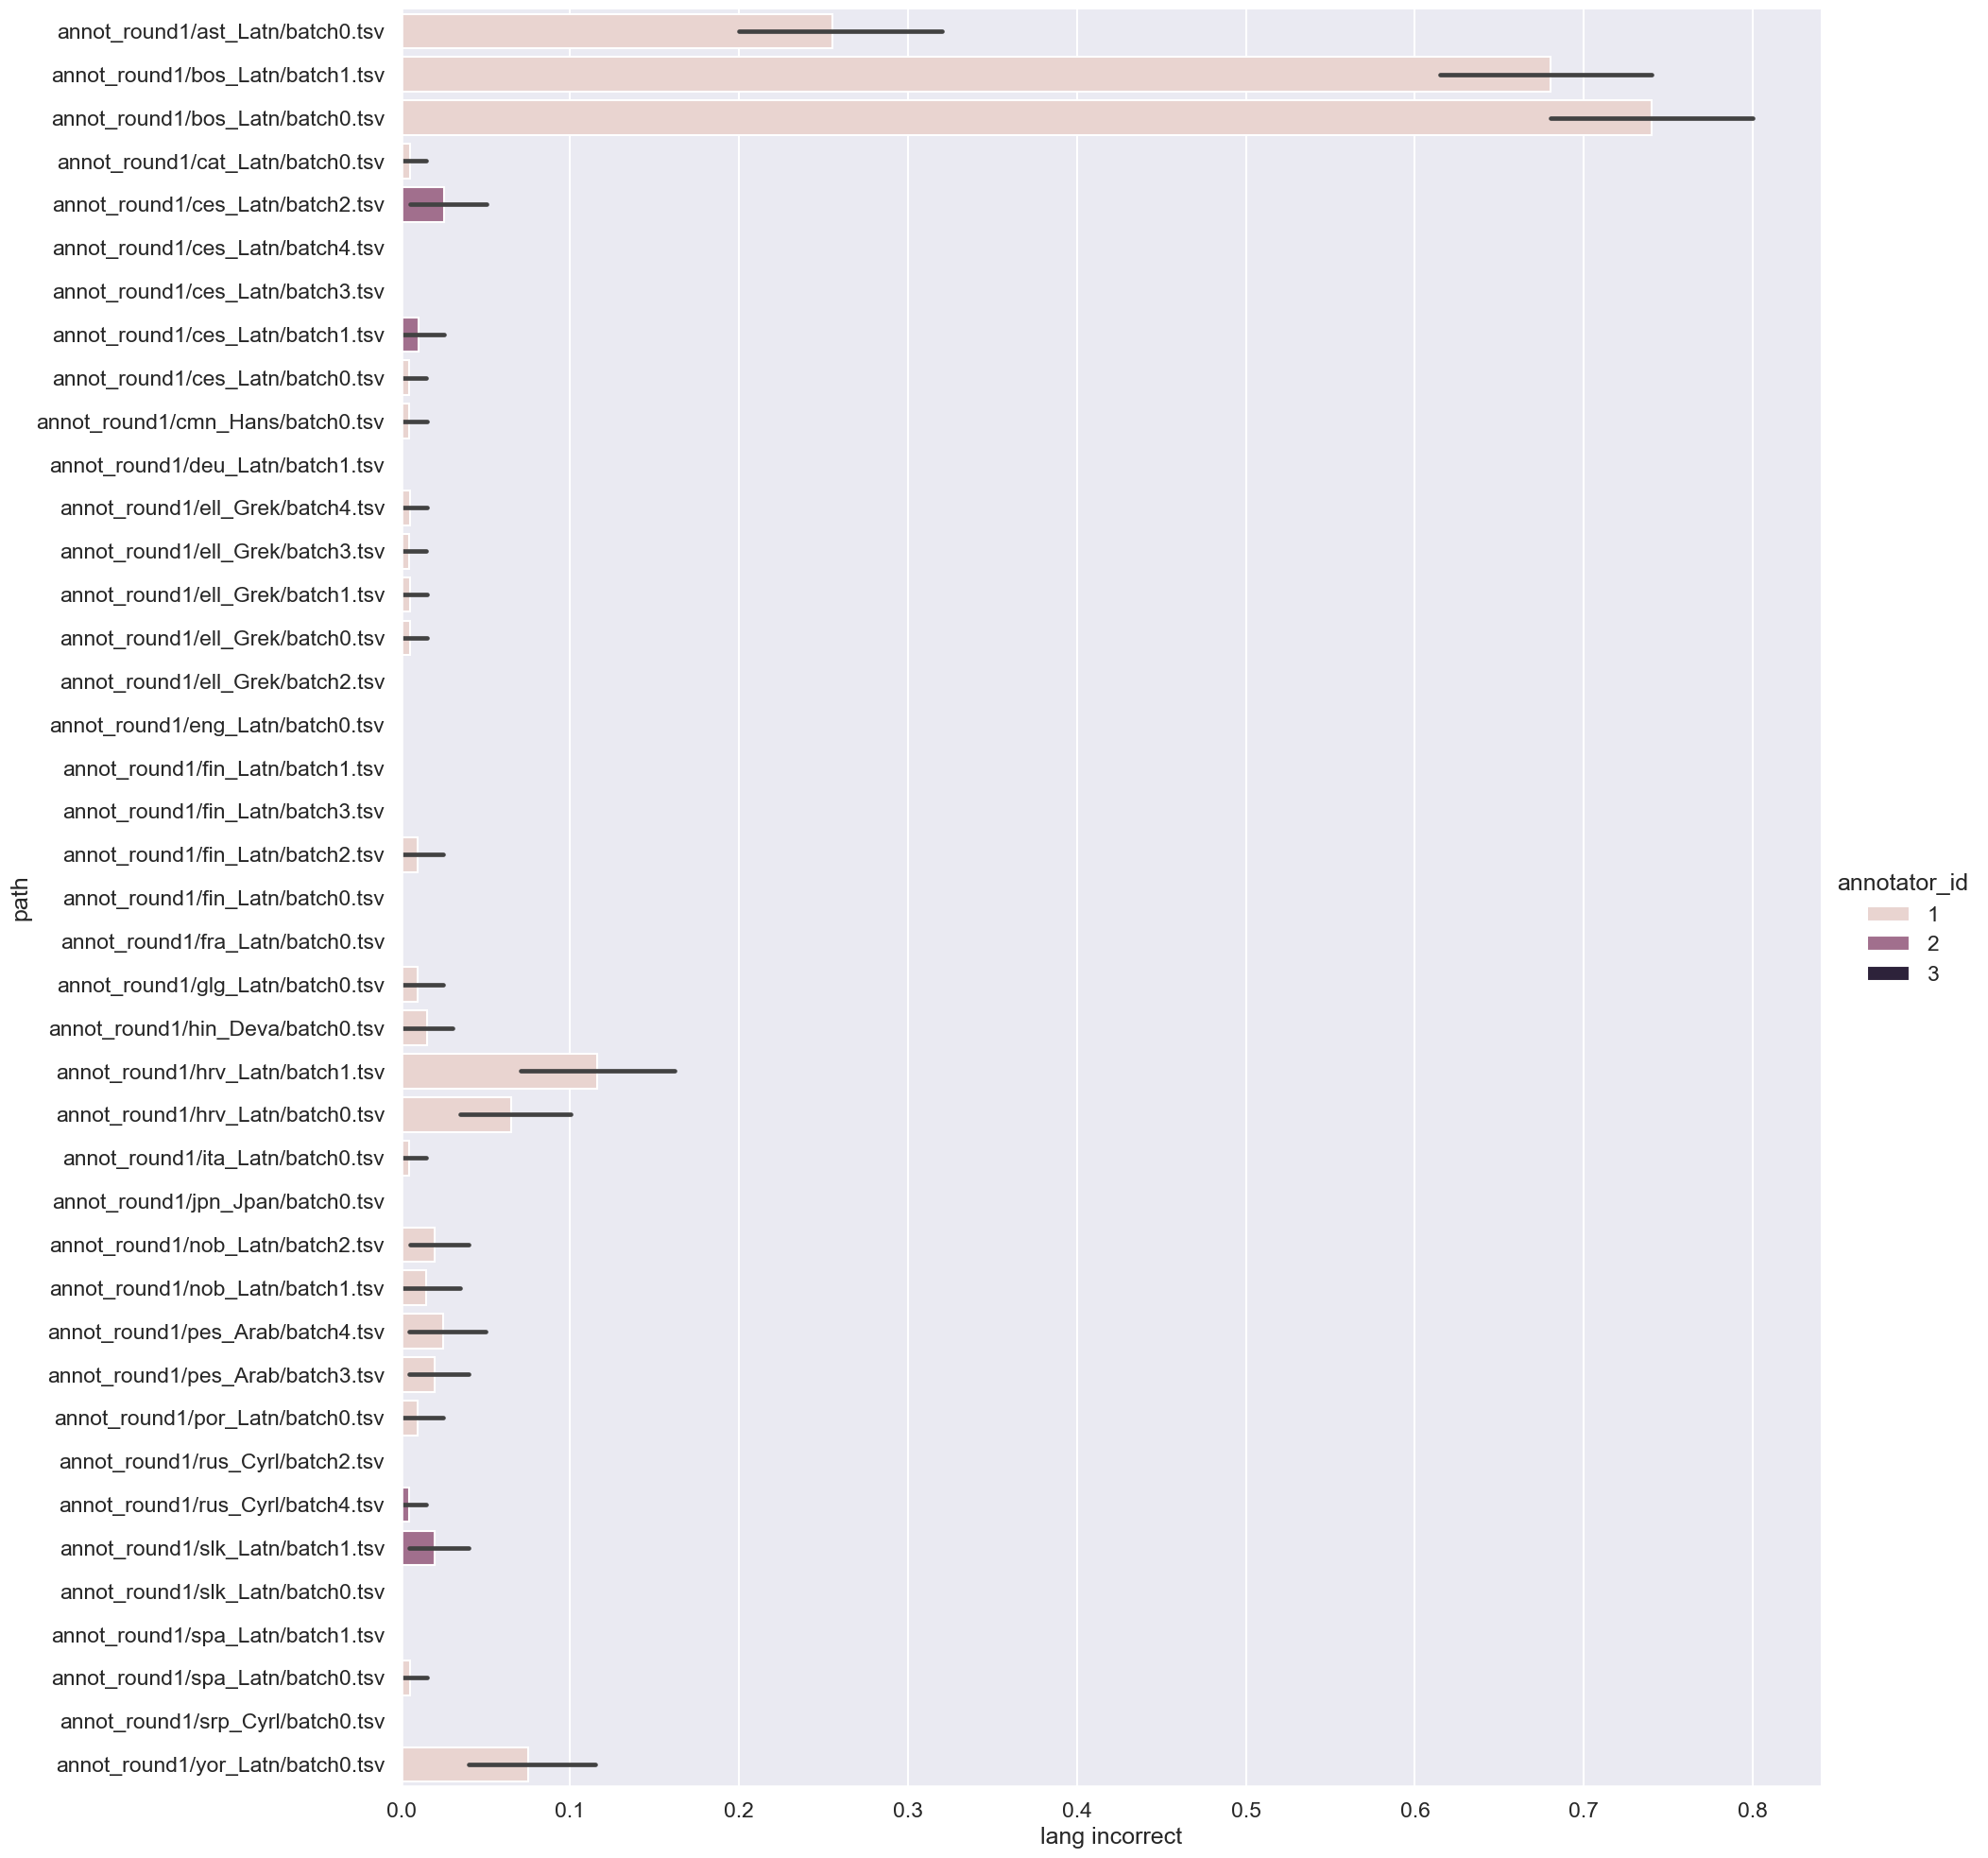

In [30]:
g = sns.catplot(data=pdf, y='path', x='lang incorrect',hue='annotator_id',
           kind='bar', errorbar=('ci', 95), height=20)

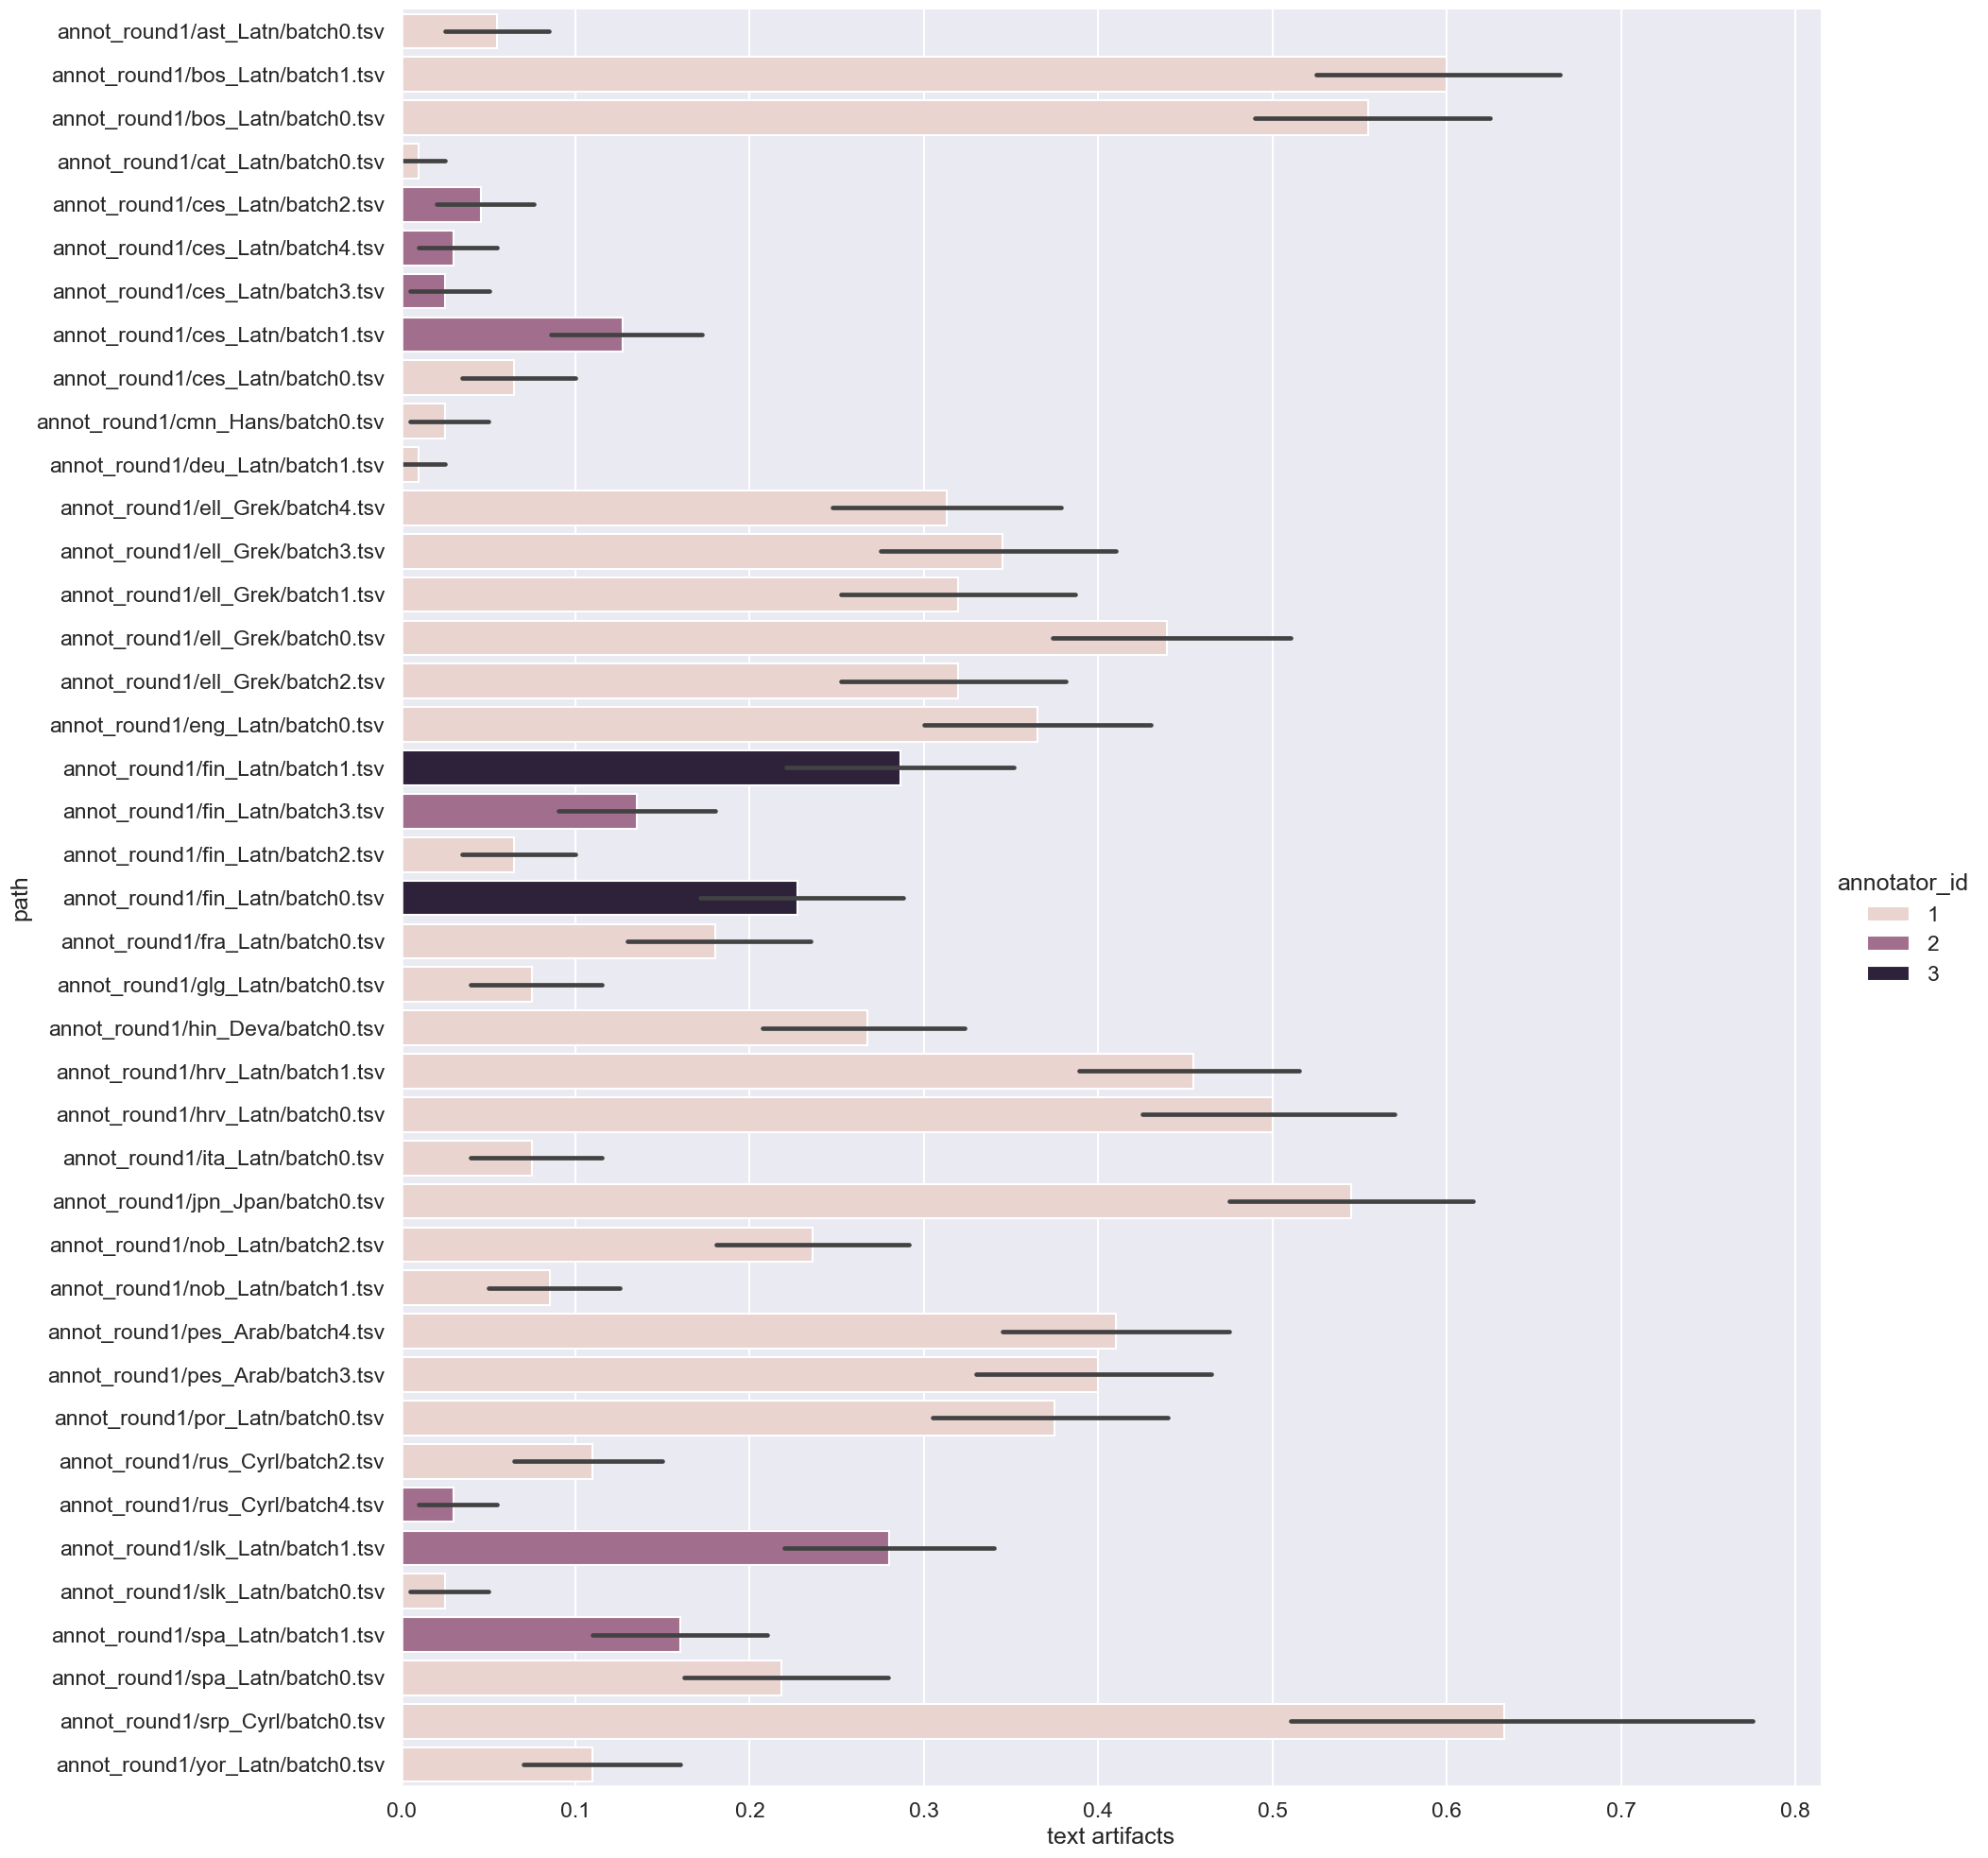

In [26]:
g = sns.catplot(data=pdf, y='path', x='text artifacts',hue='annotator_id',
           kind='bar', errorbar=('ci', 95), height=20)

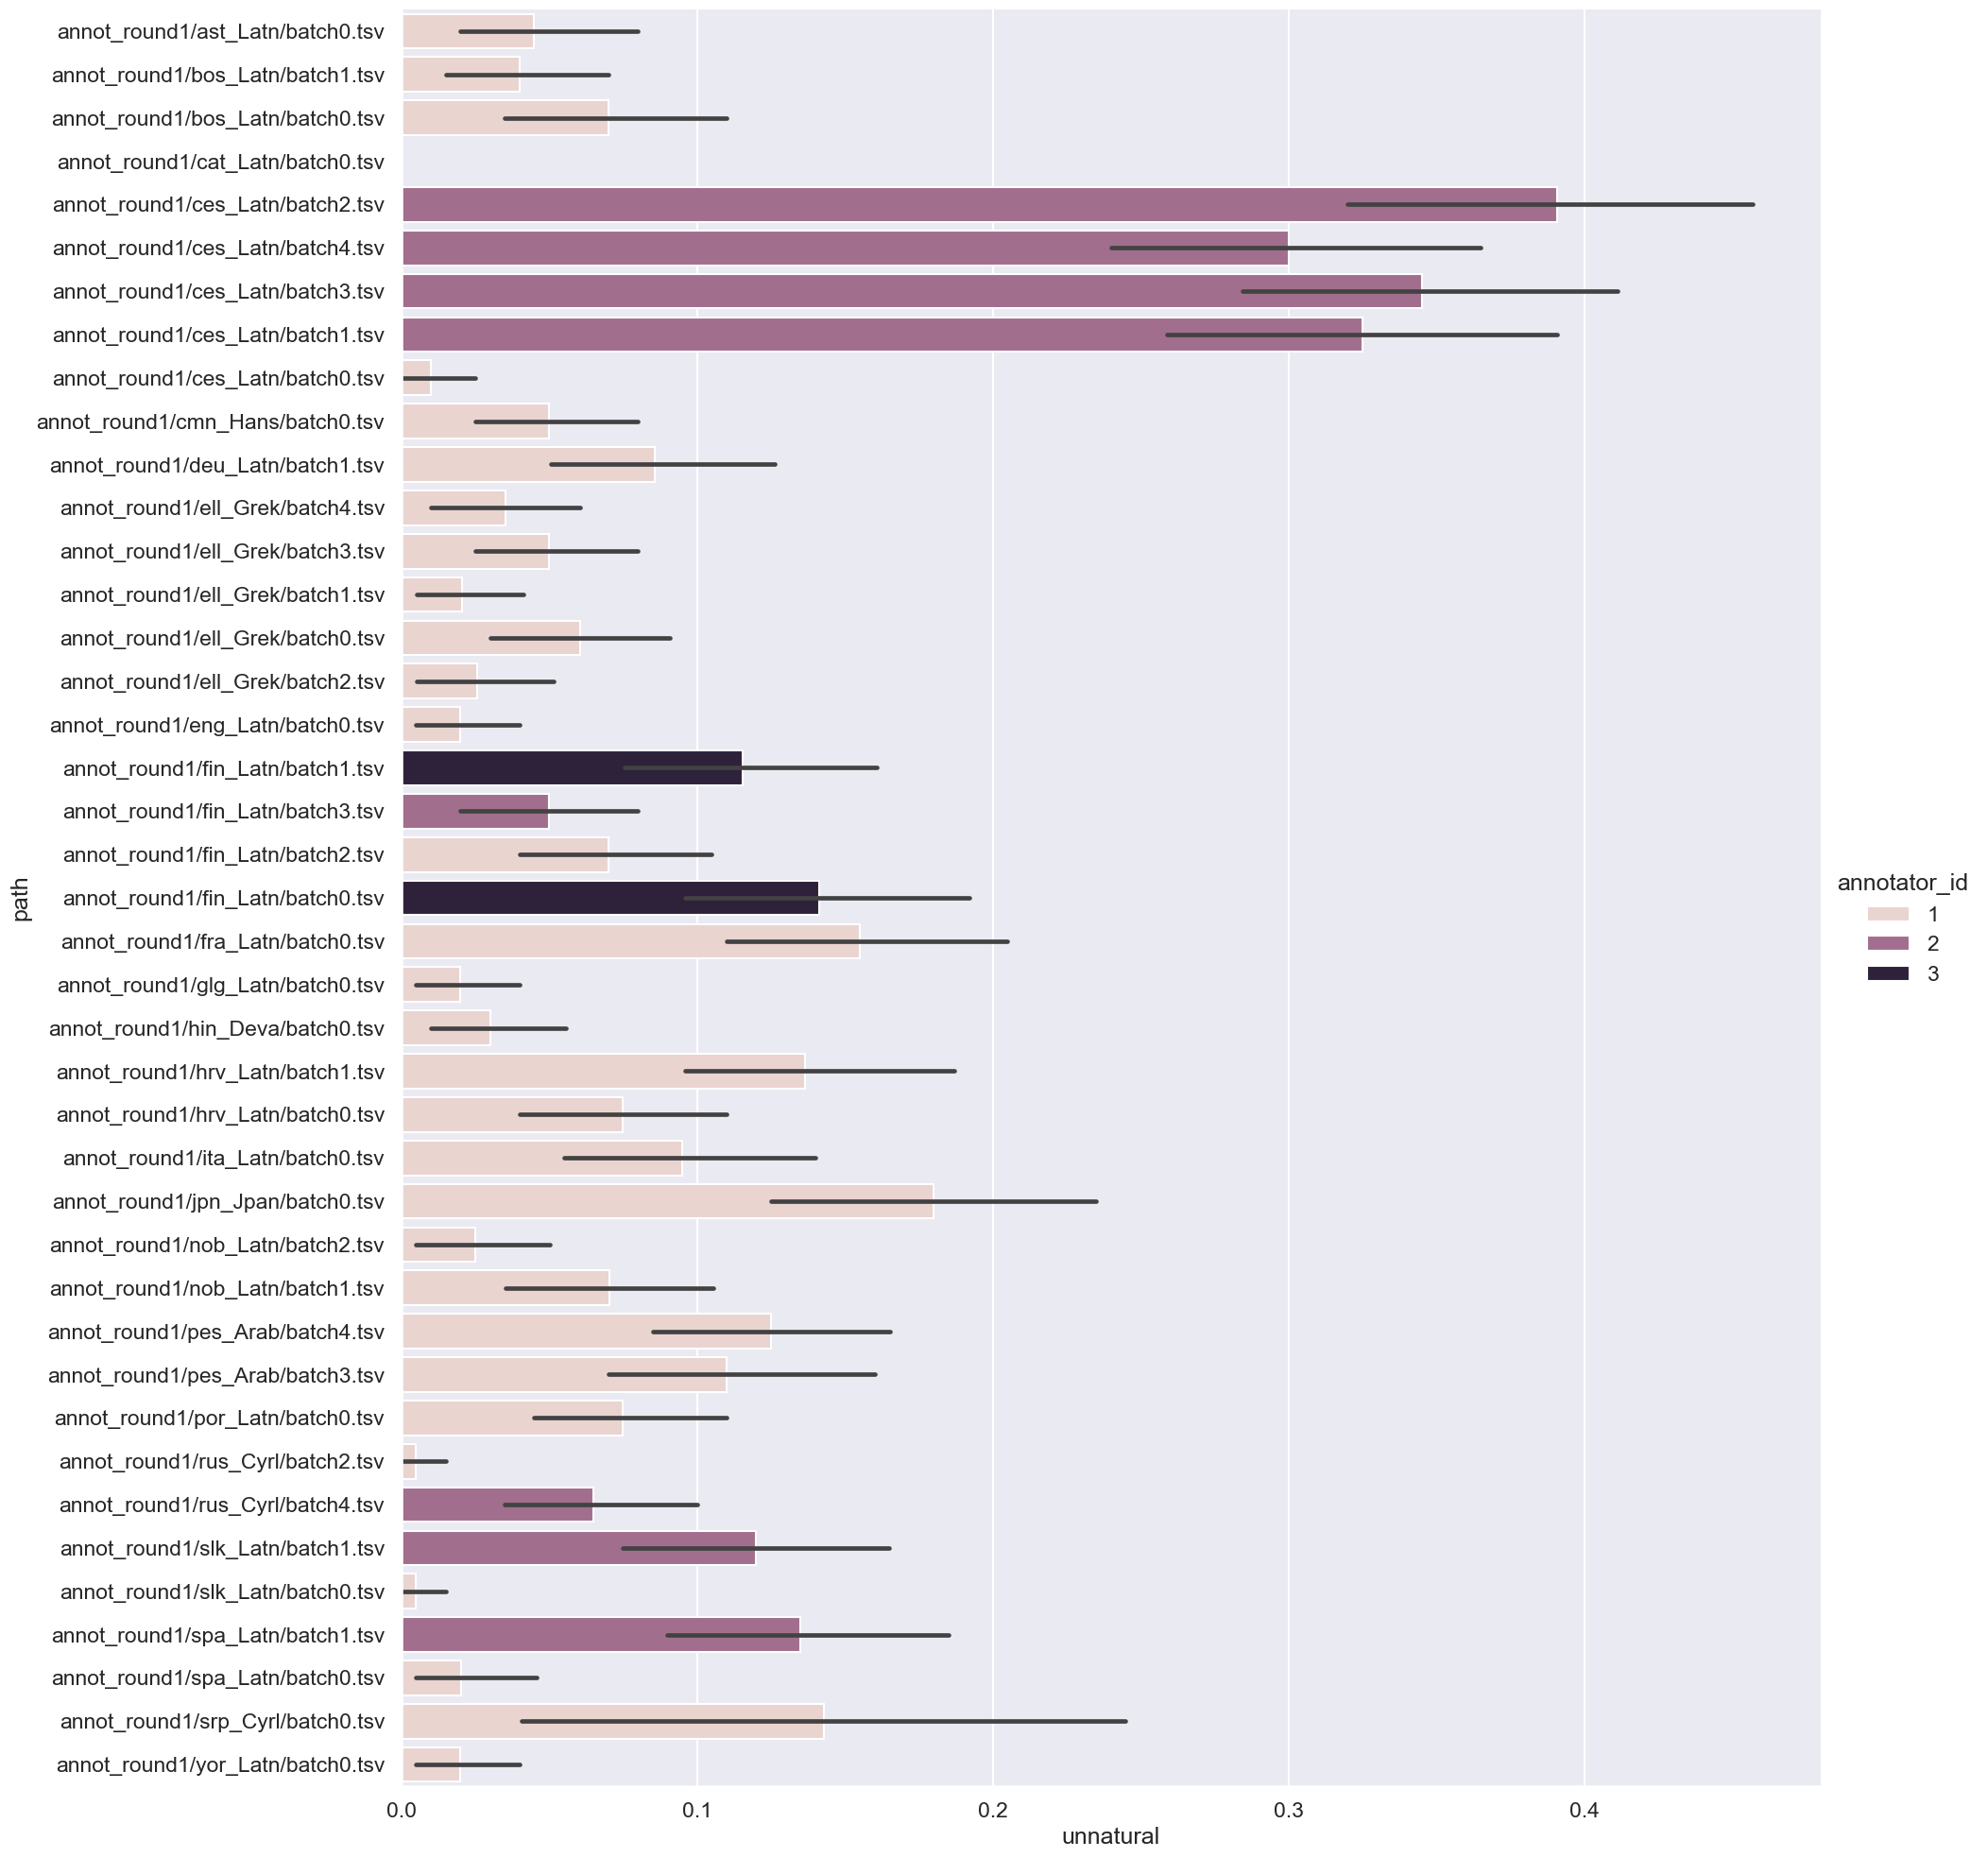

In [27]:
g = sns.catplot(data=pdf, y='path', x='unnatural',hue='annotator_id',
           kind='bar', errorbar=('ci', 95), height=20)

# Compare v3 vs v2

In [26]:
df3, df2 = [pd.read_csv(f'../release{i}_inspection/results_per_lang.tsv', sep='\t').assign(release=i) for i in (3,2)]

In [27]:
df = pd.concat((df3,df2), ignore_index=True)
df.head()

Language Name     porn text artifacts  unnatural lang correct  release
0      Asturian  0 (0-1)        5 (2-9)    4 (2-8)   74 (68-80)        3
1       Bosnian  0 (0-0)     57 (52-62)    5 (3-8)   28 (24-33)        3
2       Catalan  0 (0-1)        1 (0-3)    0 (0-1)   99 (97-99)        3
3       Chinese  1 (0-3)        2 (0-5)    5 (2-8)   99 (97-99)        3
4      Croatian  0 (0-2)     47 (42-52)  10 (7-14)   90 (87-93)        3

In [28]:
cdf = df.pivot(columns='release', index='Language Name')
cdf

porn          text artifacts              \
release                      2        3              2           3   
Language Name                                                        
Arabic                 0 (0-2)      NaN            NaN         NaN   
Asturian               0 (0-1)  0 (0-1)            NaN     5 (2-9)   
Bengali                1 (0-4)      NaN            NaN         NaN   
Bosnian                    NaN  0 (0-0)            NaN  57 (52-62)   
Catalan                0 (0-1)  0 (0-1)            NaN     1 (0-3)   
Chinese                0 (0-1)  1 (0-3)            NaN     2 (0-5)   
Croatian                   NaN  0 (0-2)            NaN  47 (42-52)   
Czech                  0 (0-2)  0 (0-1)            NaN    7 (5-10)   
Dutch                  1 (0-4)      NaN            NaN         NaN   
English                1 (0-4)  0 (0-2)            NaN  36 (29-43)   
Finnish                1 (0-3)  3 (2-4)            NaN  17 (15-20)   
Galician                   NaN  0 (0-1)            NaN    7 (4-11)   
German                 1 (0-3)      NaN            NaN         NaN   
Hindi                  2 (0-5)  0 (0-1)            NaN  26 (20-33)   
Iranian Persian        0 (0-1)  0 (0-1)            NaN  40 (35-45)   
Italian                    NaN  1 (0-4)            NaN    7 (4-11)   
Japanese                   NaN  0 (0-2)            NaN  54 (47-61)   
Marathi                0 (0-1)      NaN            NaN         NaN   
Modern Greek (1453-)   0 (0-1)  0 (0-1)            NaN  34 (31-37)   
Norwegian Bokmål       2 (0-5)  4 (2-7)            NaN  16 (12-20)   
Norwegian Nynorsk      0 (0-2)      NaN            NaN         NaN   
Polish                 1 (0-3)      NaN            NaN         NaN   
Russian                2 (1-4)  0 (0-1)            NaN     7 (4-9)   
Scottish Gaelic        0 (0-1)      NaN            NaN         NaN   
Slovak                 0 (0-1)  0 (0-0)            NaN  15 (11-19)   
Spanish                1 (0-4)  0 (0-1)            NaN  18 (15-23)   
Turkish               6 (3-10)      NaN            NaN         NaN   

                       unnatural              lang correct                
release                        2           3             2             3  
Language Name                                                             
Arabic                  9 (5-14)         NaN  100 (98-100)           NaN  
Asturian              28 (22-35)     4 (2-8)    69 (62-75)    74 (68-80)  
Bengali                  0 (0-1)         NaN  100 (98-100)           NaN  
Bosnian                      NaN     5 (3-8)           NaN    28 (24-33)  
Catalan               14 (10-20)     0 (0-1)    99 (96-99)    99 (97-99)  
Chinese               25 (19-31)     5 (2-8)    99 (97-99)    99 (97-99)  
Croatian                     NaN   10 (7-14)           NaN    90 (87-93)  
Czech                   9 (5-13)  24 (20-27)  100 (98-100)    98 (97-99)  
Dutch                    5 (2-8)         NaN  100 (98-100)           NaN  
English                13 (9-18)     2 (0-5)  100 (98-100)  100 (98-100)  
Finnish                  4 (2-8)    9 (7-11)  100 (98-100)    99 (99-99)  
Galician                     NaN     2 (0-5)           NaN    99 (96-99)  
German                   2 (0-5)         NaN    98 (95-99)           NaN  
Hindi                    2 (0-5)     3 (1-6)    98 (95-99)    98 (95-99)  
Iranian Persian       25 (19-31)   11 (8-15)    99 (96-99)    97 (95-98)  
Italian                      NaN    9 (5-14)           NaN    99 (97-99)  
Japanese                     NaN  18 (13-23)           NaN  100 (98-100)  
Marathi                 6 (3-10)         NaN    97 (94-99)           NaN  
Modern Greek (1453-)     3 (1-7)     3 (2-5)  100 (98-100)    99 (98-99)  
Norwegian Bokmål        8 (4-12)     4 (2-7)    99 (97-99)    98 (96-99)  
Norwegian Nynorsk        3 (1-6)         NaN    93 (88-95)           NaN  
Polish                  7 (4-11)         NaN  100 (98-100)           NaN  
Russian               18 (15-21)     3 (2-5)    98

In [32]:
mdf = cdf.map(lambda r: r if not isinstance(r,str) else r.split(' ')[0]).astype(float)
mdf.describe()

porn            text artifacts             unnatural             \
release          2          3              2          3          2          3   
count    22.000000  18.000000            0.0  18.000000  22.000000  18.000000   
mean      0.863636   0.500000            NaN  22.000000   9.681818   6.944444   
std       1.355604   1.150447            NaN  18.327093   7.954552   6.024189   
min       0.000000   0.000000            NaN   1.000000   0.000000   0.000000   
25%       0.000000   0.000000            NaN   7.000000   3.250000   3.000000   
50%       0.500000   0.000000            NaN  16.500000   8.500000   5.000000   
75%       1.000000   0.000000            NaN  35.500000  12.250000   9.000000   
max       6.000000   4.000000            NaN  57.000000  28.000000  24.000000   

        lang correct              
release            2           3  
count      22.000000   18.000000  
mean       97.136364   93.000000  
std         6.819408   17.334087  
min        69.000000   28.000000  
25%        98.000000   98.000000  
50%        99.000000   99.000000  
75%       100.000000   99.000000  
max       100.000000  100.000000

In [33]:
cdf = cdf.dropna(subset=[('lang correct',i) for i in (2,3)])
cdf

porn          text artifacts               unnatural  \
release                     2        3              2           3           2   
Language Name                                                                   
Asturian              0 (0-1)  0 (0-1)            NaN     5 (2-9)  28 (22-35)   
Catalan               0 (0-1)  0 (0-1)            NaN     1 (0-3)  14 (10-20)   
Chinese               0 (0-1)  1 (0-3)            NaN     2 (0-5)  25 (19-31)   
Czech                 0 (0-2)  0 (0-1)            NaN    7 (5-10)    9 (5-13)   
English               1 (0-4)  0 (0-2)            NaN  36 (29-43)   13 (9-18)   
Finnish               1 (0-3)  3 (2-4)            NaN  17 (15-20)     4 (2-8)   
Hindi                 2 (0-5)  0 (0-1)            NaN  26 (20-33)     2 (0-5)   
Iranian Persian       0 (0-1)  0 (0-1)            NaN  40 (35-45)  25 (19-31)   
Modern Greek (1453-)  0 (0-1)  0 (0-1)            NaN  34 (31-37)     3 (1-7)   
Norwegian Bokmål      2 (0-5)  4 (2-7)            NaN  16 (12-20)    8 (4-12)   
Russian               2 (1-4)  0 (0-1)            NaN     7 (4-9)  18 (15-21)   
Slovak                0 (0-1)  0 (0-0)            NaN  15 (11-19)   10 (6-15)   
Spanish               1 (0-4)  0 (0-1)            NaN  18 (15-23)    9 (5-14)   

                                  lang correct                
release                        3             2             3  
Language Name                                                 
Asturian                 4 (2-8)    69 (62-75)    74 (68-80)  
Catalan                  0 (0-1)    99 (96-99)    99 (97-99)  
Chinese                  5 (2-8)    99 (97-99)    99 (97-99)  
Czech                 24 (20-27)  100 (98-100)    98 (97-99)  
English                  2 (0-5)  100 (98-100)  100 (98-100)  
Finnish                 9 (7-11)  100 (98-100)    99 (99-99)  
Hindi                    3 (1-6)    98 (95-99)    98 (95-99)  
Iranian Persian        11 (8-15)    99 (96-99)    97 (95-98)  
Modern Greek (1453-)     3 (2-5)  100 (98-100)    99 (98-99)  
Norwegian Bokmål         4 (2-7)    99 (97-99)    98 (96-99)  
Russian                  3 (2-5)    98 (97-99)    99 (98-99)  
Slovak                   6 (4-9)  100 (98-100)    99 (97-99)  
Spanish                 7 (5-10)  100 (98-100)    99 (98-99)

In [36]:
mdf = cdf.map(lambda r: r if not isinstance(r,str) else r.split(' ')[0]).astype(float)
mdf.describe()

porn            text artifacts             unnatural             \
release          2          3              2          3          2          3   
count    13.000000  13.000000            0.0  13.000000  13.000000  13.000000   
mean      0.692308   0.615385            NaN  17.230769  12.923077   6.230769   
std       0.854850   1.325296            NaN  13.198193   8.693499   6.098550   
min       0.000000   0.000000            NaN   1.000000   2.000000   0.000000   
25%       0.000000   0.000000            NaN   7.000000   8.000000   3.000000   
50%       0.000000   0.000000            NaN  16.000000  10.000000   4.000000   
75%       1.000000   0.000000            NaN  26.000000  18.000000   7.000000   
max       2.000000   4.000000            NaN  40.000000  28.000000  24.000000   

        lang correct              
release            2           3  
count      13.000000   13.000000  
mean       97.000000   96.769231  
std         8.445906    6.881786  
min        69.000000   74.000000  
25%        99.000000   98.000000  
50%        99.000000   99.000000  
75%       100.000000   99.000000  
max       100.000000  100.000000

# By group

In [3]:
coll2group = pd.read_csv('../warc2text-runner/sample/collection2group.tsv', sep='\t')
coll2group = coll2group.set_index('collection').group.to_dict()
coll2group

{'archivebot': 'ia_archivebot',
 'cc13': 'cc_o',
 'cc14': 'cc_o',
 'cc15': 'cc_m',
 'cc16': 'cc_m',
 'cc17': 'cc_n',
 'cc18': 'cc_n',
 'cc19': 'cc_n',
 'cc20': 'cc_n',
 'cc21': 'cc_r',
 'cc22': 'cc_r',
 'cc23': 'cc_r',
 'cc24': 'cc_r',
 'wide17': 'ia_n',
 'wide16': 'ia_n',
 'wide15': 'ia_m',
 'survey3': 'ia_survey',
 'wide12': 'ia_m',
 'wide10': 'ia_o',
 'wide11': 'ia_o',
 'wide6': 'ia_o',
 'wide5': 'ia_o',
 'wide2': 'ia_o'}

In [4]:
pd.DataFrame.from_dict(coll2group, orient='index').reset_index().groupby(0).agg({'index':','.join})

index
0                                             
cc_m                                 cc15,cc16
cc_n                       cc17,cc18,cc19,cc20
cc_o                                 cc13,cc14
cc_r                       cc21,cc22,cc23,cc24
ia_archivebot                       archivebot
ia_m                             wide15,wide12
ia_n                             wide17,wide16
ia_o           wide10,wide11,wide6,wide5,wide2
ia_survey                              survey3

In [16]:
id2coll = pd.read_csv('./per_lang_group_1K_id2c.tsv.zst')
id2coll = id2coll.set_index('id').collection.to_dict()

In [17]:
df['group'] = df['id'].apply(lambda id: coll2group[id2coll[id]])
df[['source','age']] = df.group.str.split('_', expand=True)

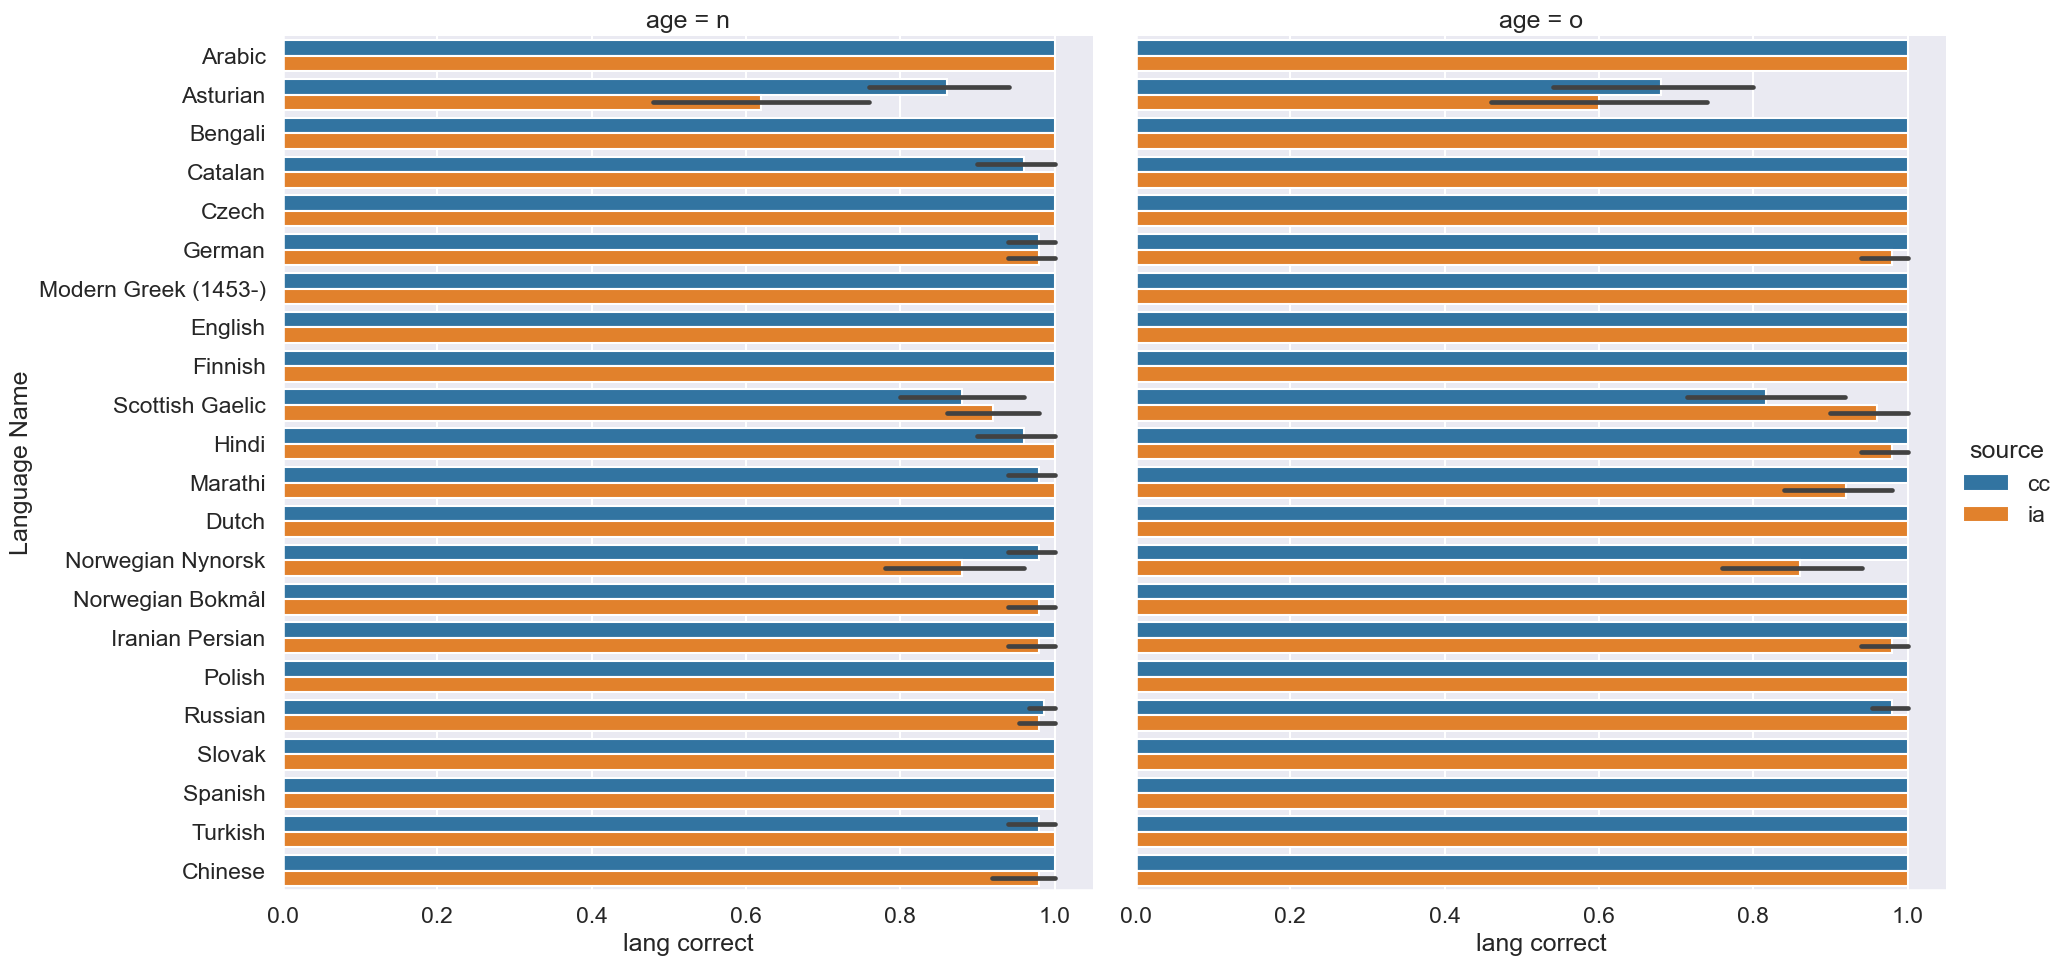

In [18]:
g = sns.catplot(data=df, y='Language Name', x='lang correct', hue='source',col='age',
                kind='bar', errorbar=('ci',95), height=10)

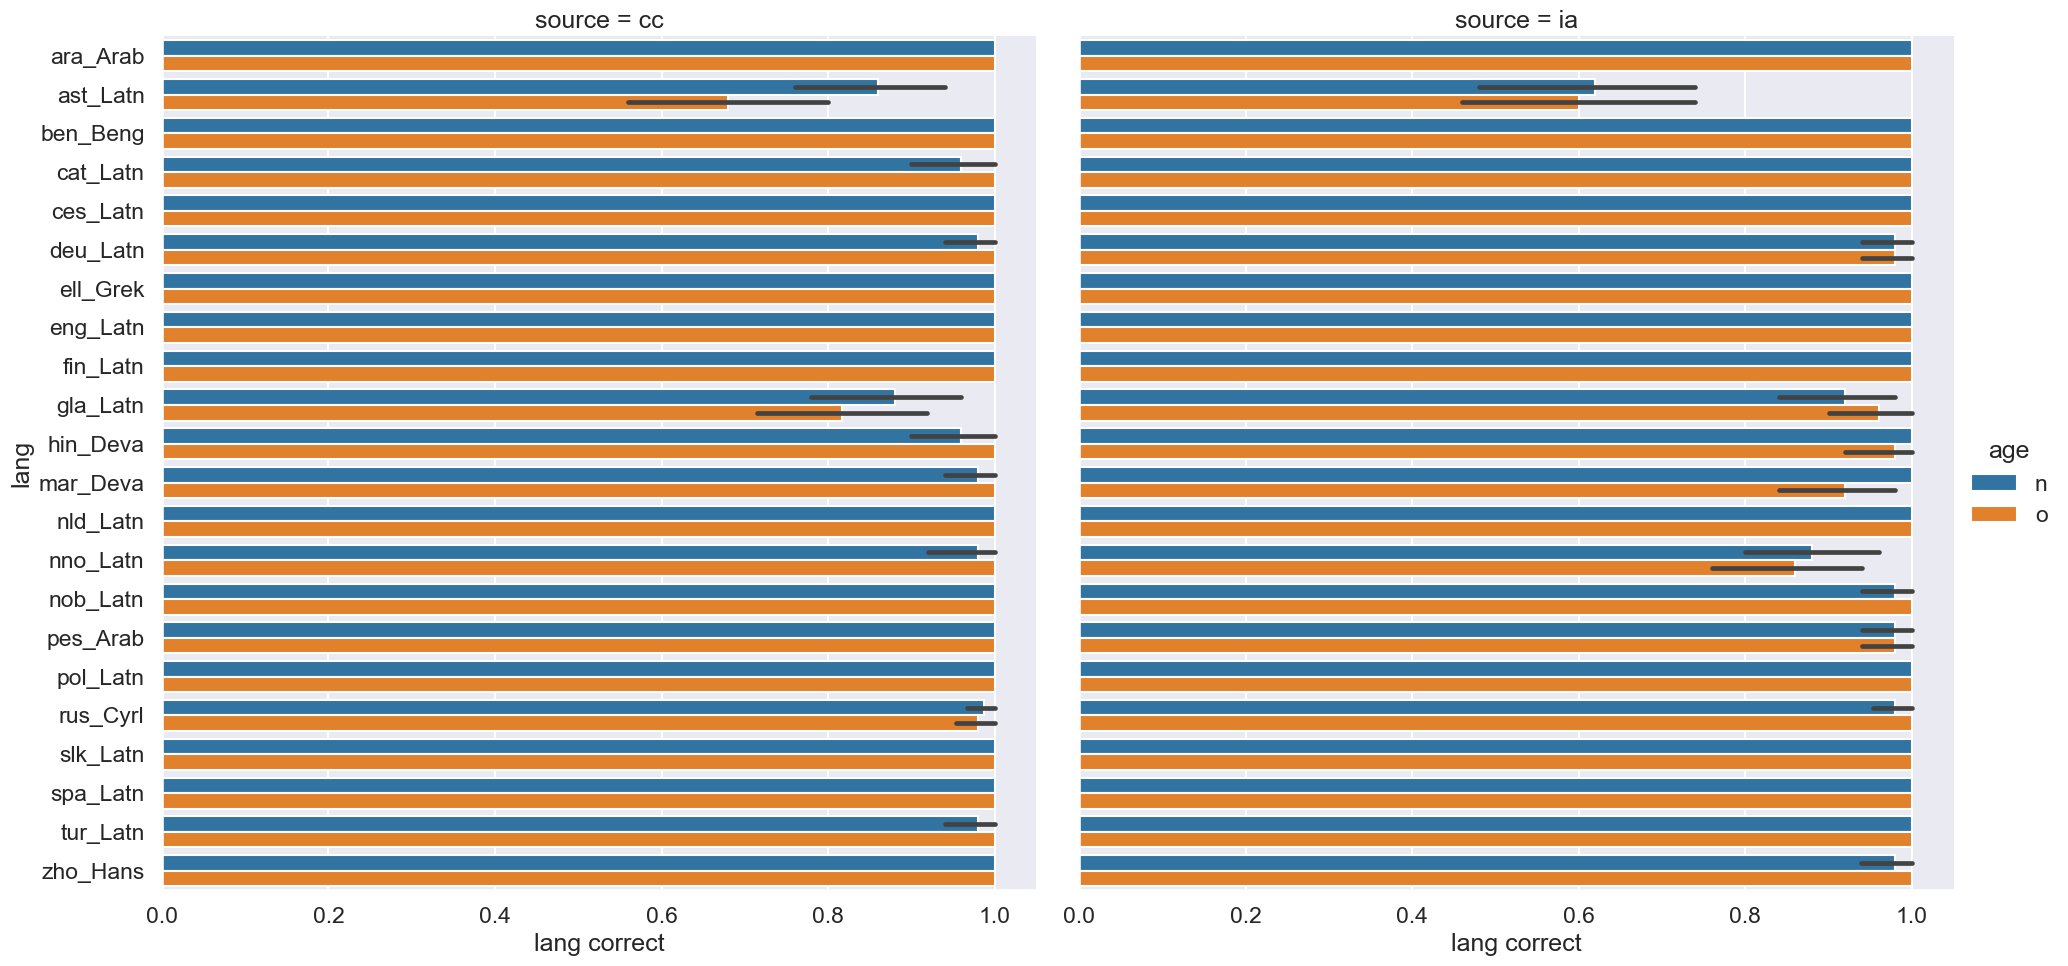

In [19]:
g = sns.catplot(data=df, y='lang', x='lang correct', col='source',hue='age',
                kind='bar', errorbar=('ci',95), height=10)

In [20]:
df['part'] = df.source+'_'+df.age
df = df.sort_values(by=['part','lang'], ascending=[False,True])  # lexicographic order will be o(ld), n(ew)

In [21]:
alldf = df.copy()
alldf['lang'] = 'TOTAL'
df1 = pd.concat([df,alldf], ignore_index=True)

In [22]:
df1['language'] = df1.lang.str.replace('_',' ')

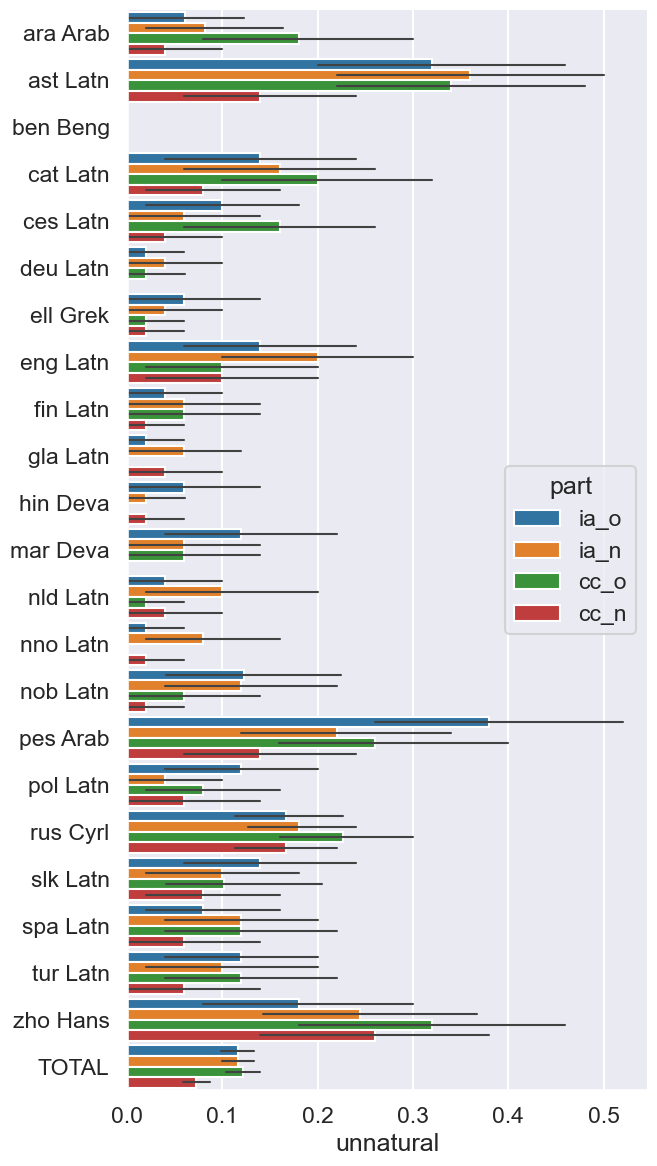

In [23]:

with sns.plotting_context('talk'):
    g = sns.catplot(data=df1, 
                    y='language', x='unnatural', hue='part',
                    kind='bar', errorbar=('ci',95), height=12, aspect=0.6,width=0.9,
                    err_kws={'linewidth':1.5}, legend_out=False)
    g.set(ylabel=None)
    g.savefig('paper/unnatural_4groups_perlang_aspect0.6.pdf')

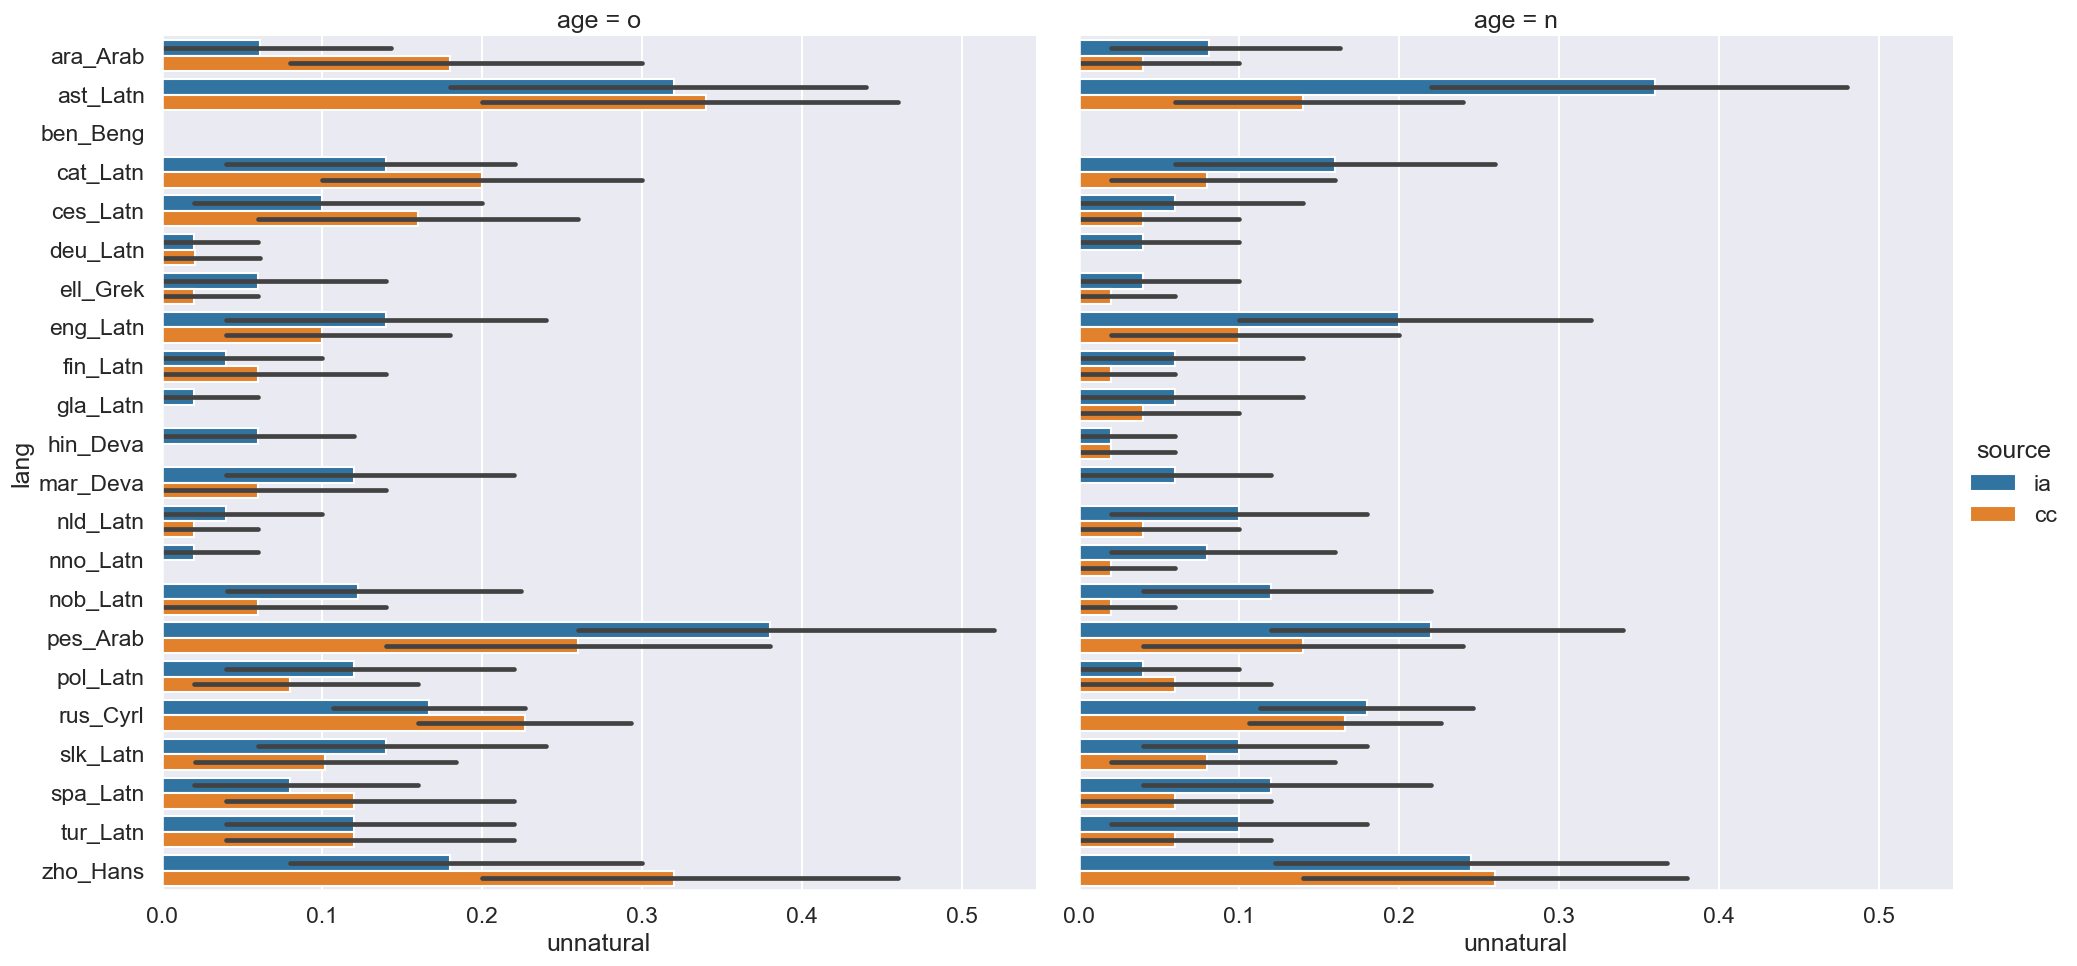

In [24]:
g = sns.catplot(data=df, y='lang', x='unnatural', hue='source',col='age',
                kind='bar', errorbar=('ci',95), height=10)

In the "new" group, IA seems to contain more unnatural texts than CC (stat. sign.?)

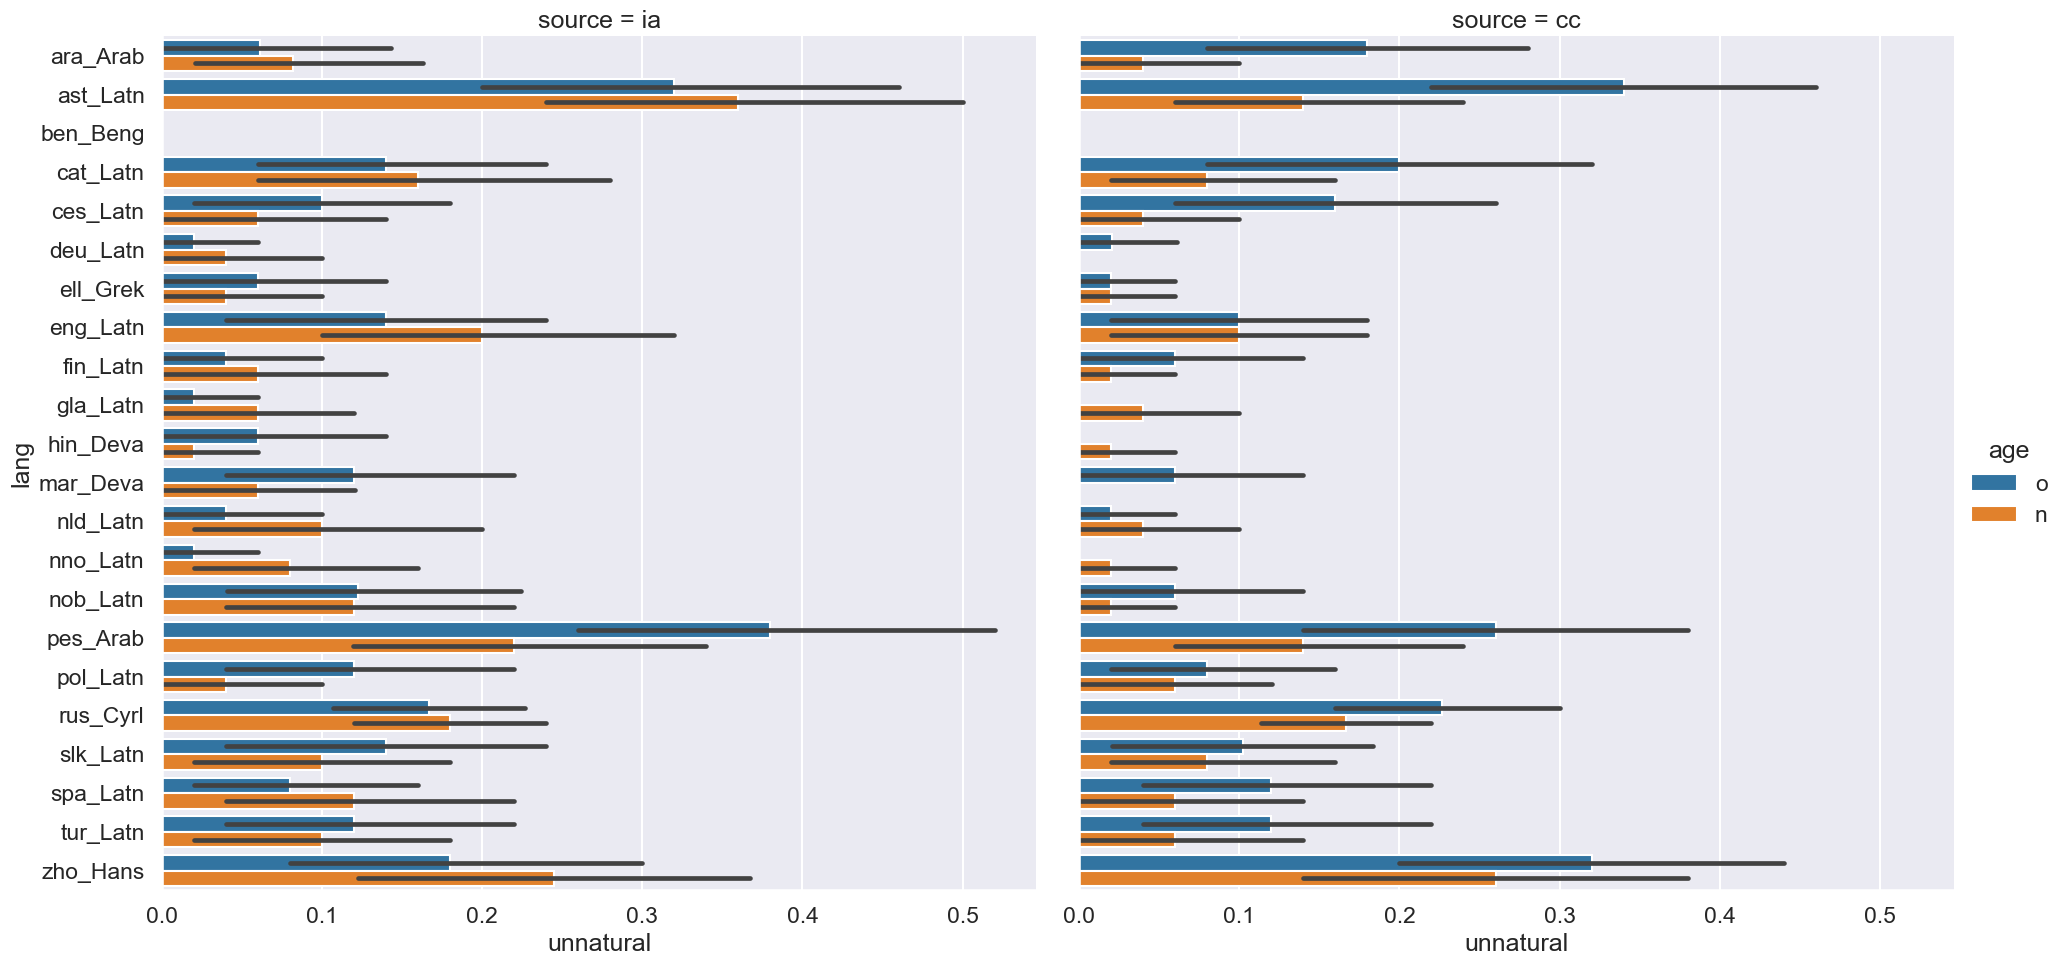

In [25]:
g = sns.catplot(data=df, y='lang', x='unnatural', hue='age',col='source',
                kind='bar', errorbar=('ci',95), height=10)

New CC seems to contain less unnatural texts compared to the old CC for most languages, though the difference is not stat. significant for each language separately.

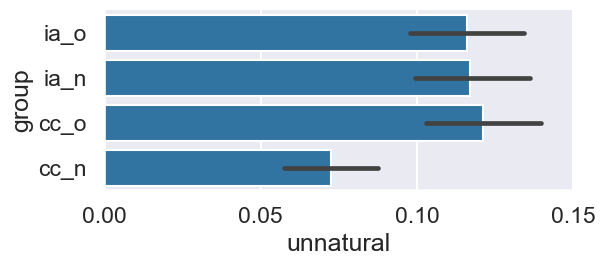

In [26]:
g = sns.catplot(data=df, x='unnatural',y='group',
                kind='bar', errorbar=('ci',95), height=3, aspect=2.0)
g.set(xticks=[0.05*i for i in range(4)])
g.savefig('paper/unnatural_4groups.pdf')

New CC seems to contain less unnatural texts compared to the old CC and both old and new IA (notice the plot is not re-weighted according to the language proportions)!

# Where texts from different languages mostly come from?

In [9]:
def load_crawl_sizes():
    wdf = pd.concat([pd.read_csv(f'../warc2text-runner/{version_folder}/{dc}/crawls.stat', sep='\t', header=None) 
                     for dc in ('nirdl','cesnet')], ignore_index=True)
    wdf[2] = wdf[2].str.split('/').str[-1]
    wdf[1] = wdf[1].str.replace('G','').str.replace('T','000').astype(int)
    wdf = wdf.groupby(2)[1].max()  # 2 CC crawls have both full and 1% sample versions, take the full size 
    wdf = wdf.reset_index(name='GB').rename(columns={2:'crawl'})
    return wdf

In [10]:
def crawl2collection(cdf):
    cdf = cdf.str.replace('CC-MAIN-20(?P<y>\d{2})-.*','cc\g<y>', regex=True)
    cdf = cdf.str.replace('_partial','').str.replace('(?P<t>[^0-9])_?0+','\g<t>', regex=True)
    return cdf

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
/var/folders/mw/3x2qsh0s2yb5krjrx4yh7drh0000gn/T/ipykernel_49447/1214251861.py:2: SyntaxWarning: invalid escape sequence '\d'
  cdf = cdf.str.replace('CC-MAIN-20(?P<y>\d{2})-.*','cc\g<y>', regex=True)
/var/folders/mw/3x2qsh0s2yb5krjrx4yh7drh0000gn/T/ipykernel_49447/1214251861.py:2: SyntaxWarning: invalid escape sequence '\g'
  cdf = cdf.str.replace('CC-MAIN-20(?P<y>\d{2})-.*','cc\g<y>', regex=True)
/var/folders/mw/3x2qsh0s2yb5krjrx4yh7drh0000gn/T/ipykernel_49447/1214251861.py:3: SyntaxWarning: invalid escape sequence '\g'
  cdf = cdf.str.replace('_partial','').str.replace('(?P<t>[^0-9])_?0+','\g<t>', regex=True)


In [11]:
wdf = load_crawl_sizes()
wdf['collection'] = crawl2collection(wdf.crawl)
wdf['group'] = wdf.collection.apply(lambda c: coll2group[c])
group_sizes = wdf.groupby('group')['GB'].sum()
print('', group_sizes.sum())
wdf = group_sizes/group_sizes.sum()
wdf

 2271000


group
cc_m    0.064729
cc_n    0.285337
cc_r    0.614267
ia_o    0.035667
Name: GB, dtype: float64

Among raw crawls used for the 2nd release:
* ia_n crawls (wide16 + wide17) is 32% 
* cc_n, cc_r are 6-8%
* ArchiveBot is 6%.

In [7]:
mdfs = []

for stage, stage_name in zip(('html_stage2','cleaned'),('2:raw text', '3:deduped&cleaned')):
    mdf = pd.read_csv(f'../warc2text-runner/stats/release{version}_{stage}_stats_mr/stats.tsv', 
                      sep='\t', header=None, names='index segments wcwords chars docs'.split())
    mdf['stage'] = stage_name
    mdfs.append(mdf)
mdf = pd.concat(mdfs, ignore_index=True)
mdf.head()

index  segments   wcwords      chars      docs  \
0  CC-MAIN-2014-15,ace_Arab      3928     39508     222748     849.0   
1  CC-MAIN-2014-15,ace_Latn  12798832  39619392  268611691  388764.0   
2  CC-MAIN-2014-15,acm_Arab    105907    681972    3939197    7098.0   
3  CC-MAIN-2014-15,acq_Arab     12300     81889     495388    1121.0   
4  CC-MAIN-2014-15,aeb_Arab   1340003   9805677   57875943   57772.0   

        stage  
0  2:raw text  
1  2:raw text  
2  2:raw text  
3  2:raw text  
4  2:raw text

In [8]:
# unpack 'index' into collection/crawl and lang
mdf[['collection','lang']] = mdf['index'].str.split(',', expand=True)
mdf.drop(columns='index', inplace=True)
mdf.collection = crawl2collection(mdf.collection)  # convert crawl to collection for html_stage2
mdf.collection.value_counts()

NameError: name 'crawl2collection' is not defined

In [32]:
mdf['group'] = mdf.collection.apply(lambda c: coll2group[c])  # annotate collection groups
assert mdf.group.isnull().sum()==0
mdf.head()

segments    wcwords      chars     docs       stage collection      lang  \
0     350.0     1376.0     8027.0      7.0  2:raw text       cc13  ace_Arab   
1   50668.0   161737.0  1106109.0   2701.0  2:raw text       cc13  ace_Latn   
2  222636.0  1421348.0  8131807.0  13283.0  2:raw text       cc13  afr_Latn   
3   52410.0   801974.0  4770640.0   2853.0  2:raw text       cc13  als_Latn   
4  132049.0   951765.0  6593191.0  13125.0  2:raw text       cc13  amh_Ethi   

  group  
0  cc_o  
1  cc_o  
2  cc_o  
3  cc_o  
4  cc_o

In [33]:
# Proportions of extracted texts per group, for each stage separately
gdf = mdf.groupby(['stage','group']).sum(numeric_only=True)
gdf = gdf.groupby('stage').transform(lambda r: r/r.sum() if is_numeric_dtype(r) else r)
gdf

segments   wcwords     chars      docs
stage             group                                                
2:raw text        cc_m           0.036269  0.050544  0.045231  0.036620
                  cc_n           0.131958  0.171626  0.165089  0.125594
                  cc_o           0.060108  0.087388  0.078349  0.062508
                  cc_r           0.124239  0.187575  0.193901  0.124276
                  ia_archivebot  0.007379  0.009888  0.009403  0.010095
                  ia_m           0.175681  0.146371  0.146115  0.146704
                  ia_n           0.231950  0.155994  0.166937  0.260096
                  ia_o           0.228588  0.184884  0.188805  0.228017
                  ia_survey      0.003828  0.005730  0.006171  0.006090
3:deduped&cleaned cc_m           0.033933  0.041084  0.036900  0.032413
                  cc_n           0.224541  0.255944  0.247893  0.249451
                  cc_o           0.033228  0.039485  0.035337  0.031892
                  cc_r           0.252270  0.304379  0.294942  0.279958
                  ia_archivebot  0.006959  0.007524  0.007015  0.006612
                  ia_m           0.153272  0.130195  0.134158  0.138383
                  ia_n           0.130043  0.091667  0.109241  0.120023
                  ia_o           0.158553  0.121121  0.126081  0.133165
                  ia_survey      0.007201  0.008601  0.008434  0.008102

In [34]:
wdf

group
cc_m             0.014419
cc_n             0.059503
cc_o             0.022466
cc_r             0.080646
ia_archivebot    0.060919
ia_m             0.181408
ia_n             0.316733
ia_o             0.242776
ia_survey        0.021130
Name: GB, dtype: float64

In [35]:
wdf1 = wdf.reset_index().melt(id_vars='group', value_vars='GB', value_name='prop', var_name='quantity')
wdf1['stage'] = '1:crawls'
gdf1 = gdf.reset_index().melt(id_vars=['stage','group'],value_vars=['docs','chars'], value_name='prop', var_name='quantity')

pdf = pd.concat([wdf1,gdf1], ignore_index=True)

In [36]:
pdf['crawl_type'] = pdf.group.str.split('_').str[0]

totaldf = pdf.groupby(['stage','crawl_type','quantity']).agg({'group':'first','prop':'sum'}).reset_index()
totaldf

totaldf['group'] = 'TOTAL_' + totaldf.crawl_type

pdf = pd.concat([pdf, totaldf], ignore_index=True)
pdf

group quantity      prop              stage crawl_type
0            cc_m       GB  0.014419           1:crawls         cc
1            cc_n       GB  0.059503           1:crawls         cc
2            cc_o       GB  0.022466           1:crawls         cc
3            cc_r       GB  0.080646           1:crawls         cc
4   ia_archivebot       GB  0.060919           1:crawls         ia
5            ia_m       GB  0.181408           1:crawls         ia
6            ia_n       GB  0.316733           1:crawls         ia
7            ia_o       GB  0.242776           1:crawls         ia
8       ia_survey       GB  0.021130           1:crawls         ia
9            cc_m     docs  0.036620         2:raw text         cc
10           cc_n     docs  0.125594         2:raw text         cc
11           cc_o     docs  0.062508         2:raw text         cc
12           cc_r     docs  0.124276         2:raw text         cc
13  ia_archivebot     docs  0.010095         2:raw text         ia
14           ia_m     docs  0.146704         2:raw text         ia
15           ia_n     docs  0.260096         2:raw text         ia
16           ia_o     docs  0.228017         2:raw text         ia
17      ia_survey     docs  0.006090         2:raw text         ia
18           cc_m     docs  0.032413  3:deduped&cleaned         cc
19           cc_n     docs  0.249451  3:deduped&cleaned         cc
20           cc_o     docs  0.031892  3:deduped&cleaned         cc
21           cc_r     docs  0.279958  3:deduped&cleaned         cc
22  ia_archivebot     docs  0.006612  3:deduped&cleaned         ia
23           ia_m     docs  0.138383  3:deduped&cleaned         ia
24           ia_n     docs  0.120023  3:deduped&cleaned         ia
25           ia_o     docs  0.133165  3:deduped&cleaned         ia
26      ia_survey     docs  0.008102  3:deduped&cleaned         ia
27           cc_m    chars  0.045231         2:raw text         cc
28           cc_n    chars  0.165089         2:raw text         cc
29           cc_o    chars  0.078349         2:raw text         cc
30           cc_r    chars  0.193901         2:raw text         cc
31  ia_archivebot    chars  0.009403         2:raw text         ia
32           ia_m    chars  0.146115         2:raw text         ia
33           ia_n    chars  0.166937         2:raw text         ia
34           ia_o    chars  0.188805         2:raw text         ia
35      ia_survey    chars  0.006171         2:raw text         ia
36           cc_m    chars  0.036900  3:deduped&cleaned         cc
37           cc_n    chars  0.247893  3:deduped&cleaned         cc
38           cc_o    chars  0.035337  3:deduped&cleaned         cc
39           cc_r    chars  0.294942  3:deduped&cleaned         cc
40  ia_archivebot    chars  0.007015  3:deduped&cleaned         ia
41           ia_m    chars  0.134158  3:deduped&cleaned         ia
42           ia_n    chars  0.109241  3:deduped&cleaned         ia
43           ia_o    chars  0.126081  3:deduped&cleaned         ia
44      ia_survey    chars  0.008434  3:deduped&cleaned         ia
45       TOTAL_cc       GB  0.177035           1:crawls         cc
46       TOTAL_ia       GB  0.822965           1:crawls         ia
47       TOTAL_cc    chars  0.482570         2:raw text         cc
48       TOTAL_cc     docs  0.348998         2:raw text         cc
49       TOTAL_ia    chars  0.517430         2:raw text         ia
50       TOTAL_ia     docs  0.651002         2:raw text         ia
51       TOTAL_cc    chars  0.615072  3:deduped&cleaned         cc
52       TOTAL_cc     docs  0.593715  3:deduped&cleaned         cc
53       TOTAL_ia    chars  0.384928  3:deduped&cleaned         ia
54       TOTAL_ia     docs  0.406285  3:deduped&cleaned         ia

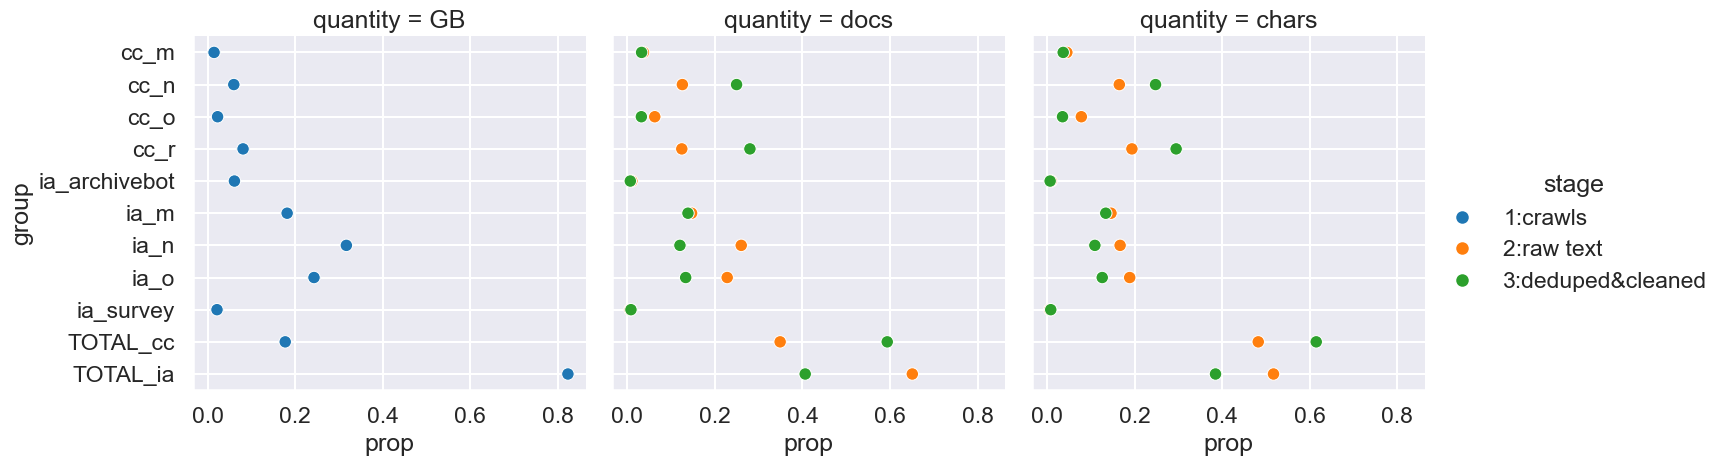

In [37]:
g = sns.relplot(data=pdf, y='group', x='prop', hue='stage', col='quantity')
g.savefig('plots/group-contribs.pdf')

ia_n is 32% of raw crawls, but contributes to 11-12% of texts (both in docs and chars) in the cleaned version. Similar disproportion for other IA crawls.

cc_r is 8% of raw crawls, but contributes to 28-30% of texts (both in docs and chars) in the cleaned version. Similarly for cc_n. 

The proportions of texts extracted from cc_r, cc_n crawls significantly increase between html_stage2 and cleaned versions, for IA they decrease (ia_n, ia_o) or remain the same (compare orange and greed dots).

In [38]:
pdf = pdf.sort_values(by='stage')

In [39]:
np.linspace(0.2, 1, 4)

array([0.2       , 0.46666667, 0.73333333, 1.        ])

In [40]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

groups_colors = [(f'{t}_{age}', cm(0.2+a*0.3)) for t, cm in zip(('cc','ia'),(plt.cm.Reds, plt.cm.Blues)) 
                  for a,age in enumerate('rnmo')]
groups_colors = [(g,c) for g,c in groups_colors if g in pdf.group.unique()]
groups_colors += [() for g,c in zip()]
groups, colors = list(zip(*groups_colors))
groups += tuple(g for g in pdf.group.unique() if g not in groups and not g.startswith('TOTAL'))
colors += tuple(mcolors.to_rgba(c) for c in ('yellow', 'yellowgreen'))


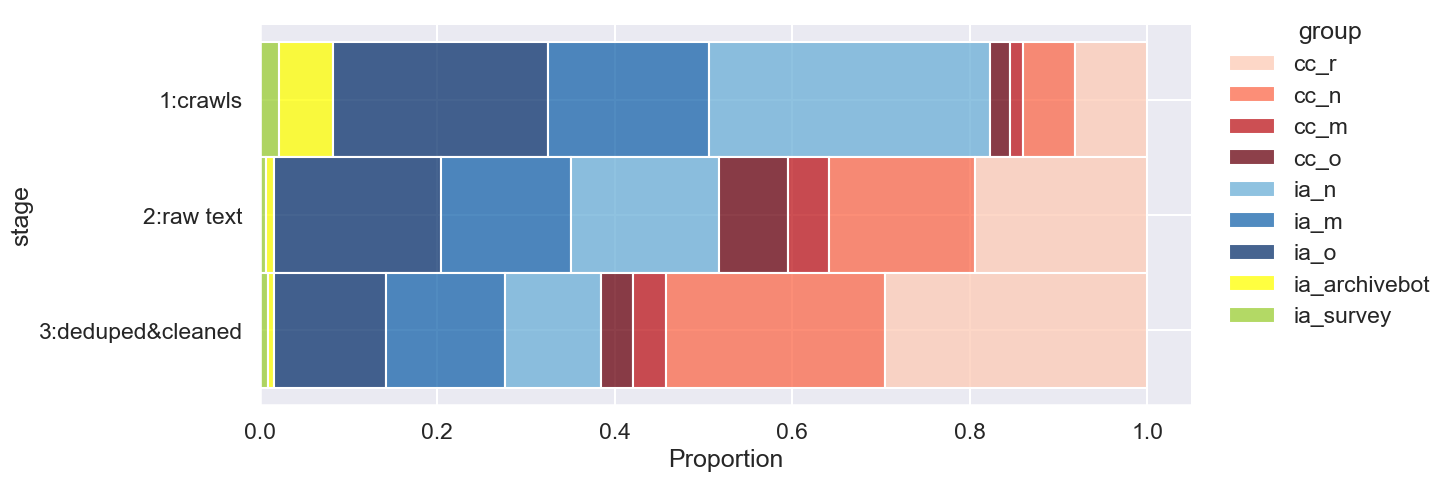

In [41]:
g = sns.displot(pdf.query("quantity!='docs' & ~group.str.startswith('TOTAL')"), 
                y='stage', hue='group', weights='prop', multiple='stack', hue_order=groups,
                 palette=colors,legend=True, aspect=2.5)
g.set(xlabel='Proportion')
sns.move_legend(g, 'upper right')
g.savefig('paper/stages_groups_proportions.pdf')

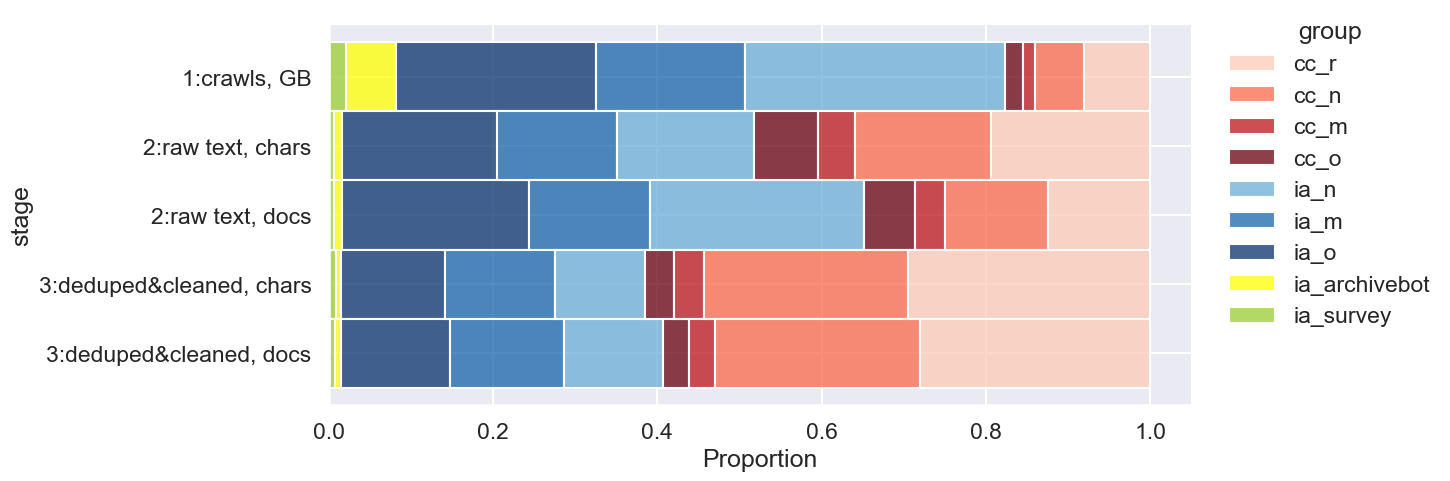

In [42]:
pdf1 = pdf.copy()
pdf1['stage'] = pdf1.stage+', '+pdf1.quantity
pdf1 = pdf1.sort_values(by='stage')
g = sns.displot(pdf1.query("~group.str.startswith('TOTAL')"), 
                y='stage', hue='group', weights='prop', multiple='stack', hue_order=groups,
                 palette=colors,legend=True, aspect=2.5)
g.set(xlabel='Proportion')
sns.move_legend(g, 'upper right')
# g.savefig('paper/stages_groups_proportions.pdf')

In [43]:
mdf = mdf.groupby(['stage','group','lang']).sum(numeric_only=True)
mdf.head()

segments      wcwords         chars       docs
stage      group lang                                                      
2:raw text cc_m  ace_Arab     53054.0     406868.0  1.648335e+07     1349.0
                 ace_Latn  16691546.0   49254043.0  3.369627e+08  1133606.0
                 afr_Latn  62757394.0  298375958.0  1.738354e+09  3273123.0
                 als_Latn  15934083.0  250568564.0  1.506149e+09   613750.0
                 amh_Ethi  36733715.0  209778348.0  1.310600e+09  5144889.0

In [44]:
langs_sorted = mdf.loc['3:deduped&cleaned'].groupby('lang')['chars'].agg('sum').sort_values().index

pdf = mdf.groupby(['stage','lang']).transform(lambda r: r/r.sum()).reset_index()

pdf = pdf.set_index('lang').loc[langs_sorted].reset_index()

pdf['style'] = pdf.group.apply(lambda s: s if s in ('ia_archivebot','ia_survey') else s.split('_')[0])

### proportions of texts (characters) coming from different crawl groups for each language

In [45]:
pdf['language'] = pdf.lang.str.replace('_',' ')

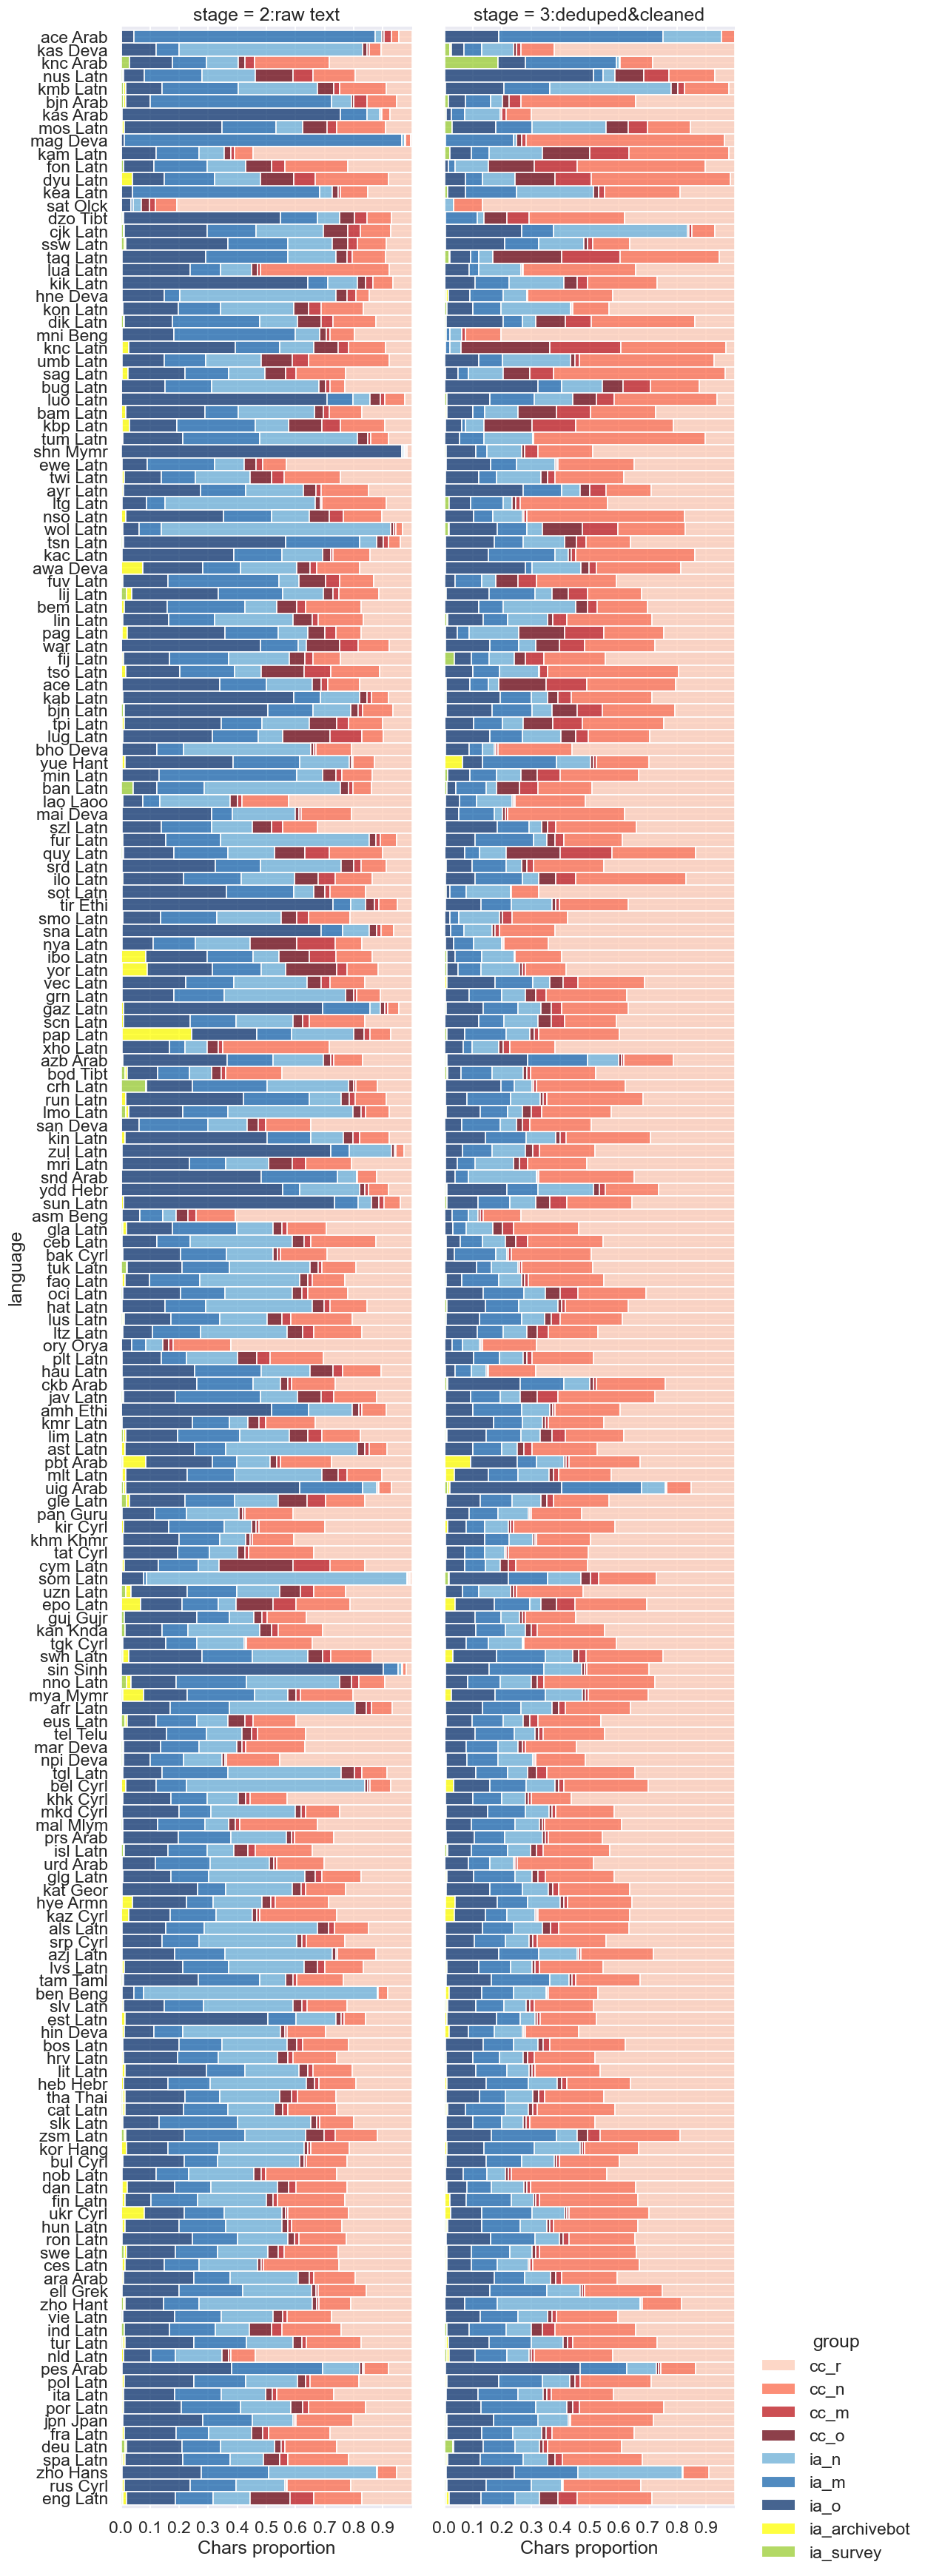

In [46]:

g = sns.displot(data=pdf, 
                y='language', hue='group', weights='chars',  multiple='stack', hue_order=groups,
                col='stage',palette=colors,legend=True, height=35, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.set(xmargin=0.0, ymargin=0.0015)
g.set(xlabel='Chars proportion')
sns.move_legend(g, 'lower right')
g.savefig('plots/group-contribs-perlang-chars-stacked.pdf')

In [47]:
np.random.seed=2025
random_langs = np.random.choice(pdf.lang.unique(), size=30,)

In [48]:
langs_ia_contrib = pdf.query('stage.str.startswith("3") &  group.str.startswith("ia_")').groupby('lang').chars.sum().sort_values()

In [49]:
for stage in pdf.stage.unique():
    print((pdf[pdf.stage==stage].query('group.str.startswith("ia_")').groupby('lang').chars.sum() > 0.7).sum())

49
6


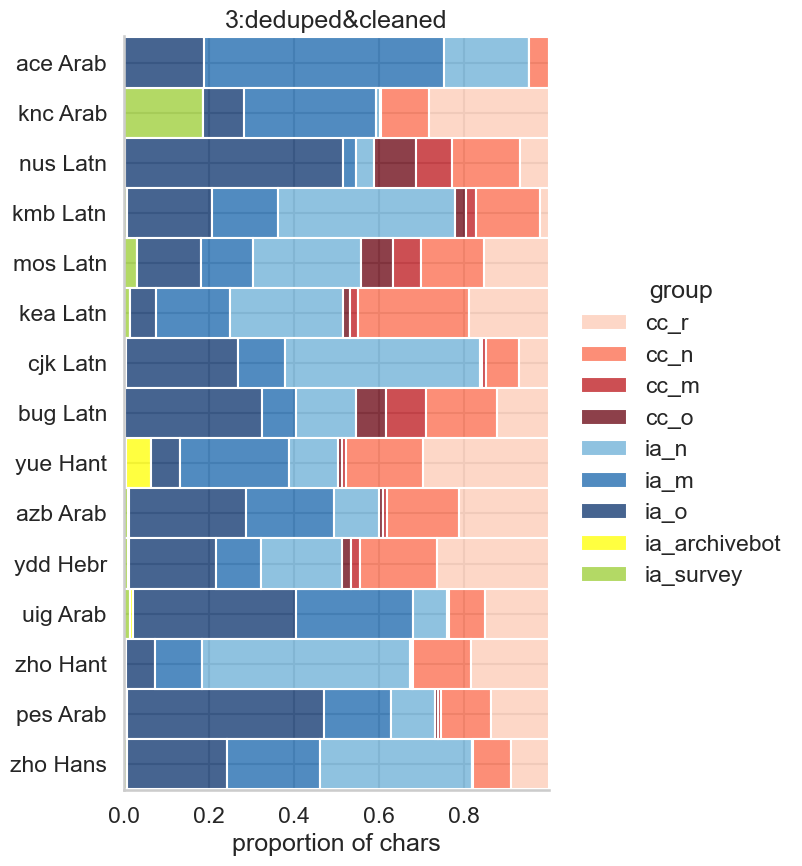

In [50]:
sns.set_style('whitegrid')
sns.set_context('talk')
g = sns.displot(data=pdf[pdf.lang.isin(langs_ia_contrib.index[-15:])].query('stage.str.startswith("3")'), 
                y='language', hue='group', weights='chars',  multiple='stack', hue_order=groups,
                col='stage',palette=colors,legend=True, height=9, aspect=0.7)
g.set(xticks=[0.2*i for i in range(5)])
g.set(xmargin=0.0, ymargin=0.0015)
g.set(xlabel='proportion of chars') 
g.set(ylabel=None) 

for ax in g.axes.flatten():
    ax.set_title(ax.get_title().replace('stage = ',''))
# sns.move_legend(g, 'lower right', bbox_to_anchor=(0.70,0.1))
# g.legend.get_frame().set_visible(True)
g.savefig('paper/group-contribs-perlang-chars-stacked-largest_cc_contrib.pdf')

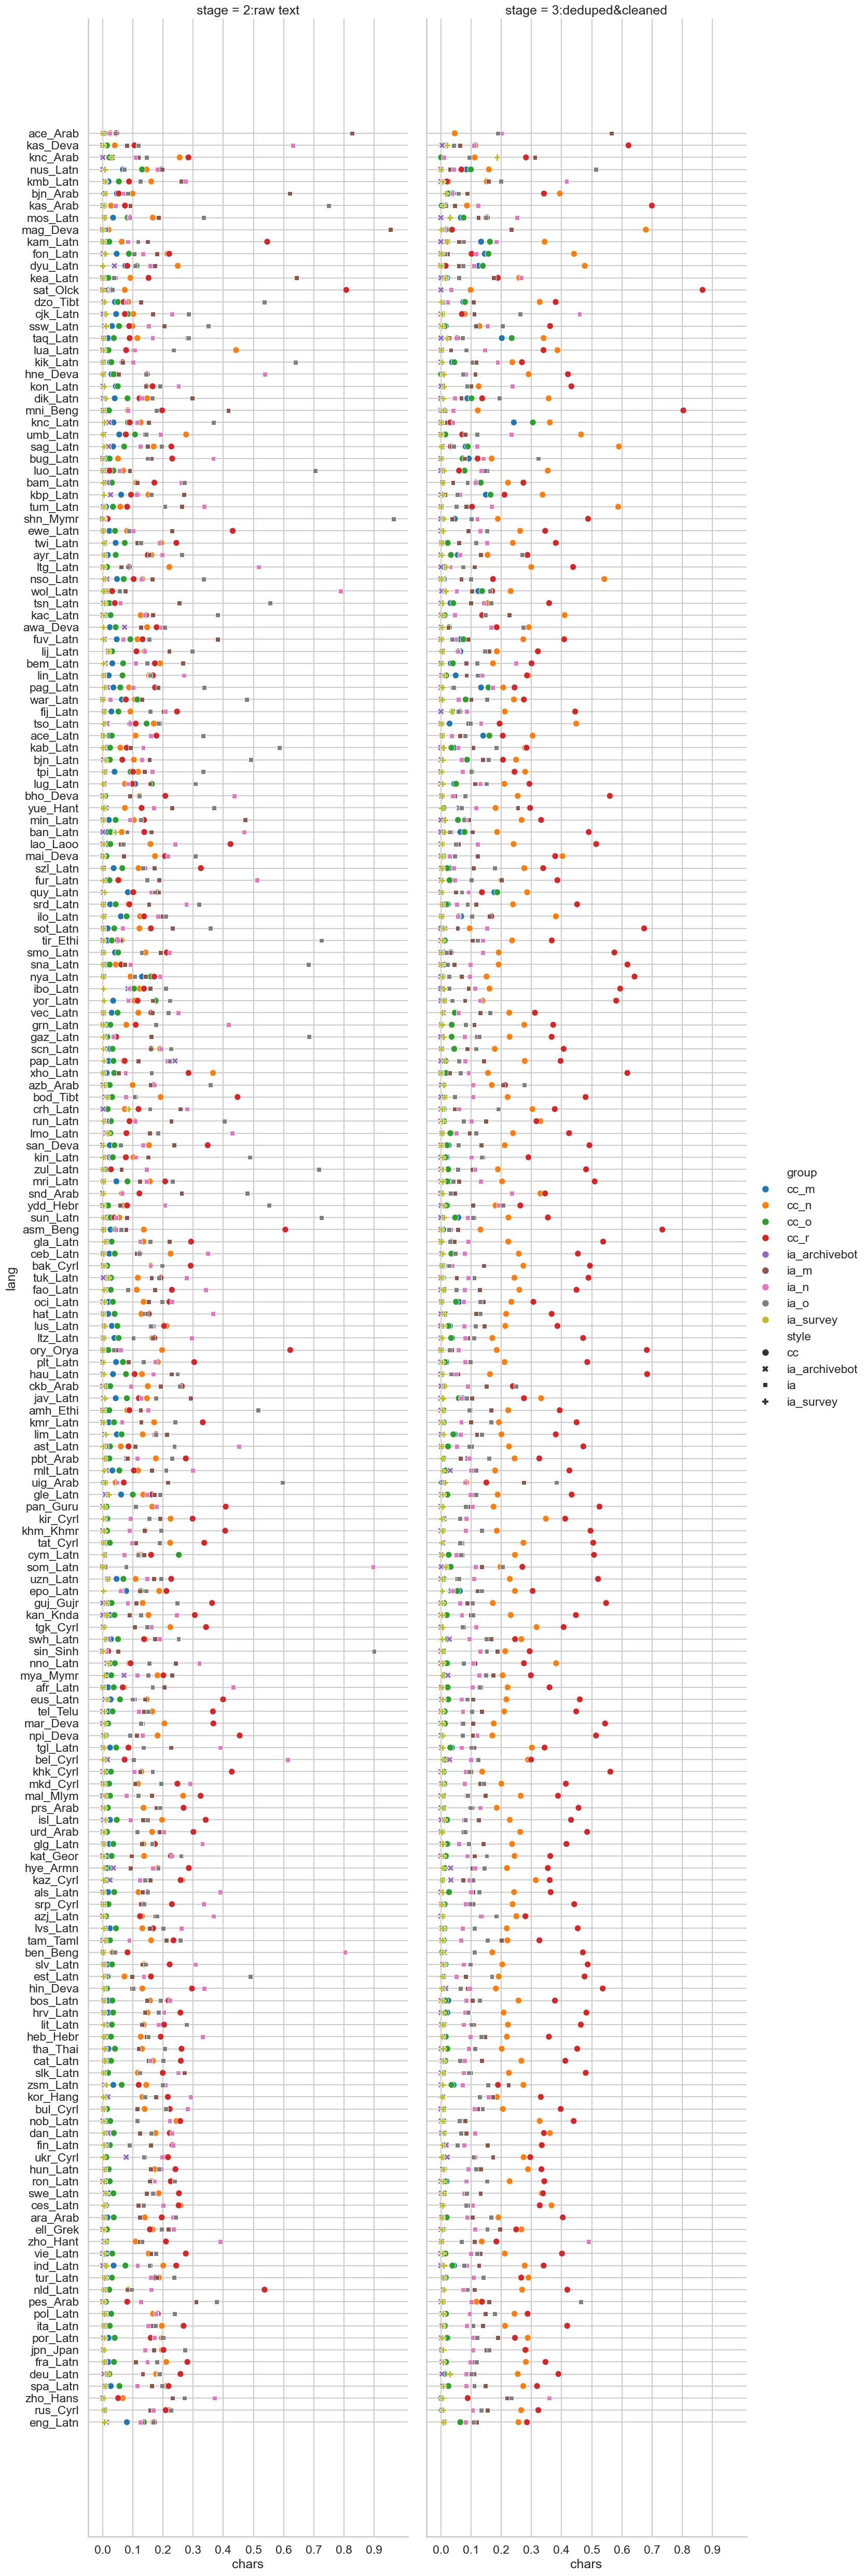

In [51]:
# proportions of texts (characters) coming from different crawl groups for each language
g = sns.relplot(data=pdf, y='lang', x='chars', hue='group', kind='scatter', 
                style='style', col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.savefig('plots/group-contribs-perlang-chars.pdf')

### proportions of documents coming from different crawl groups for each language

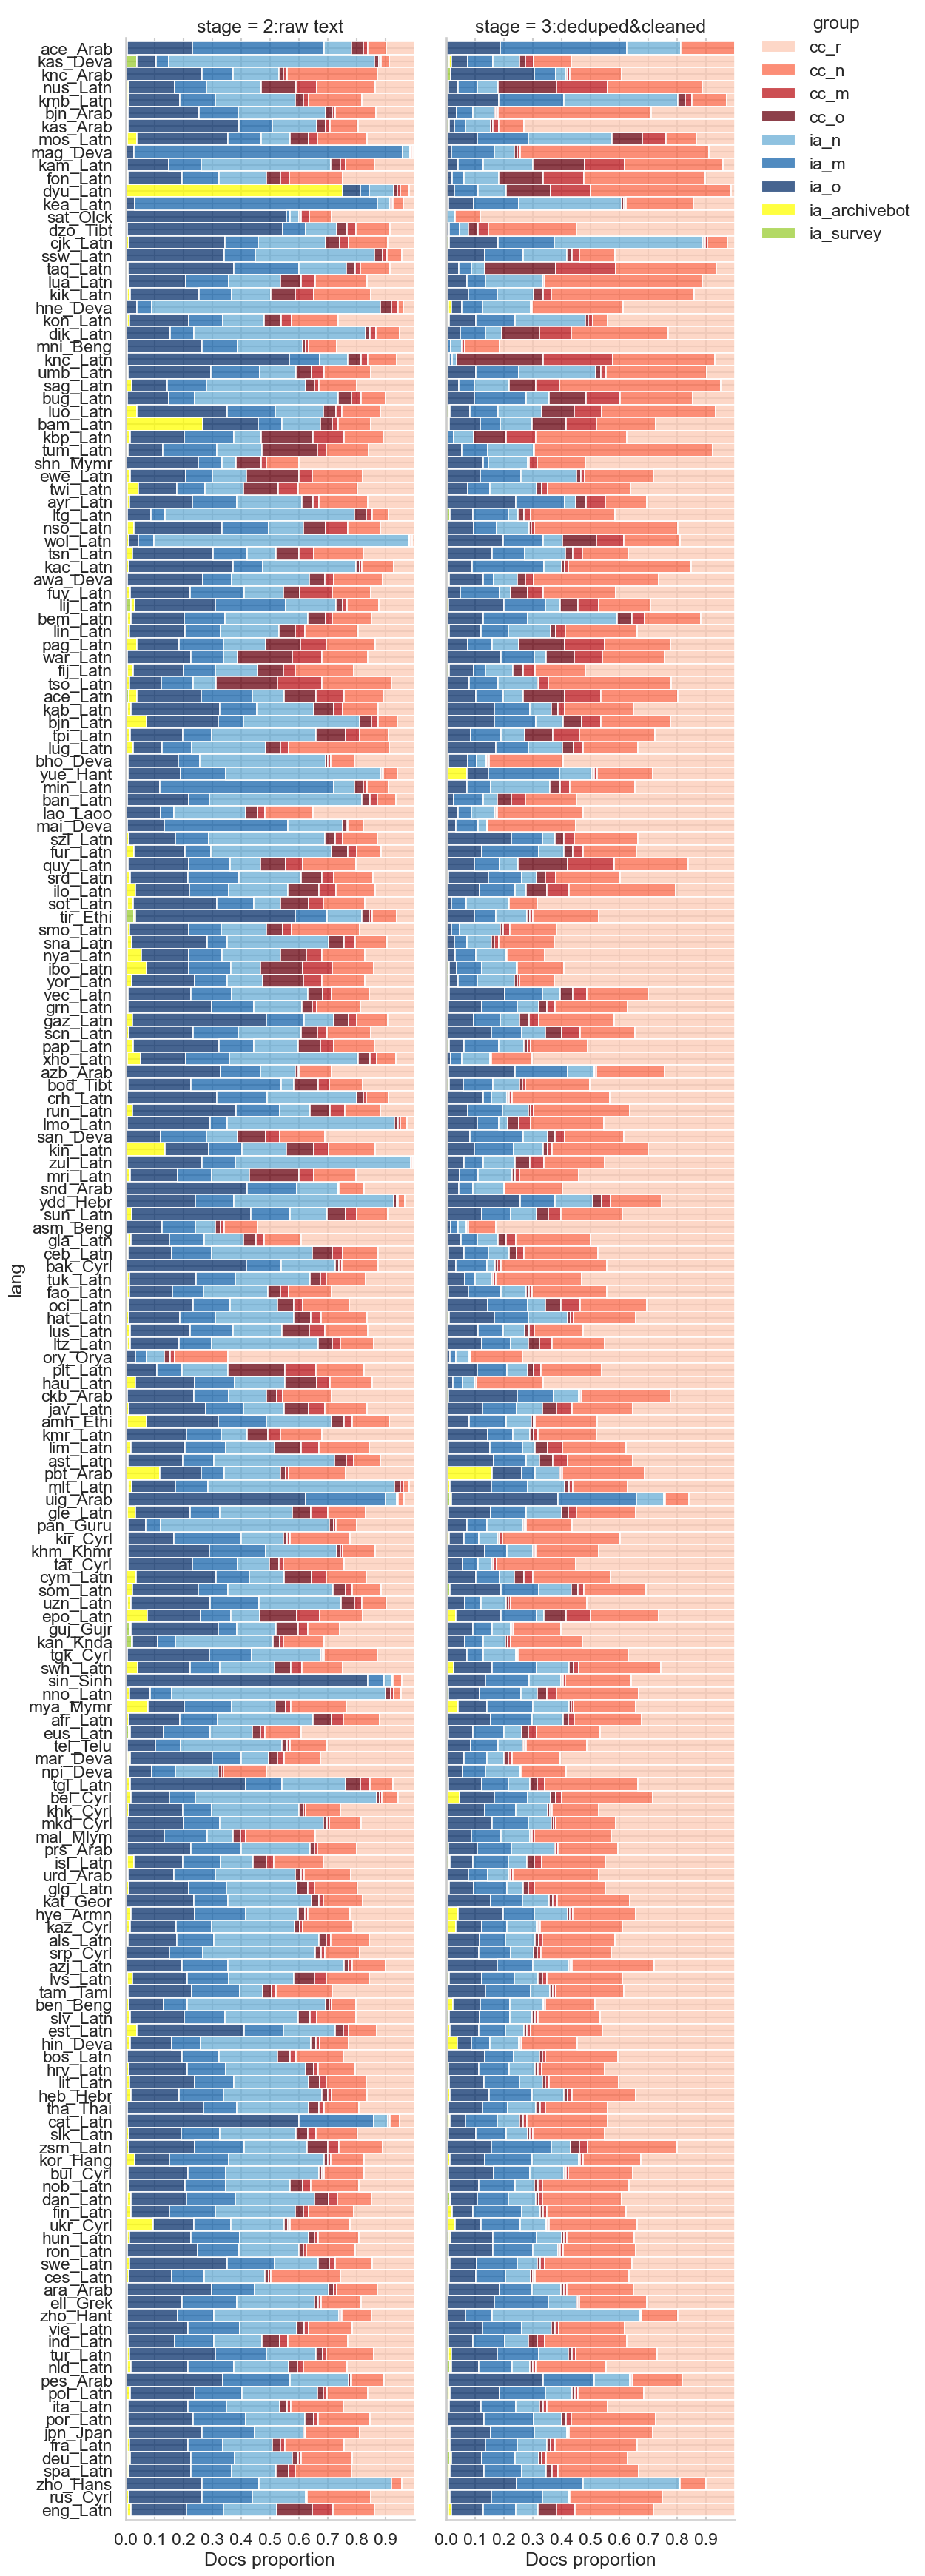

In [52]:

g = sns.displot(data=pdf, y='lang', hue='group', weights='docs',  multiple='stack', hue_order=groups,
                col='stage',palette=colors,legend=True, height=35, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.set(xmargin=0.0, ymargin=0.0015)
g.set(xlabel='Docs proportion')
sns.move_legend(g, 'upper right')
g.savefig('plots/group-contribs-perlang-docs-stacked.pdf')

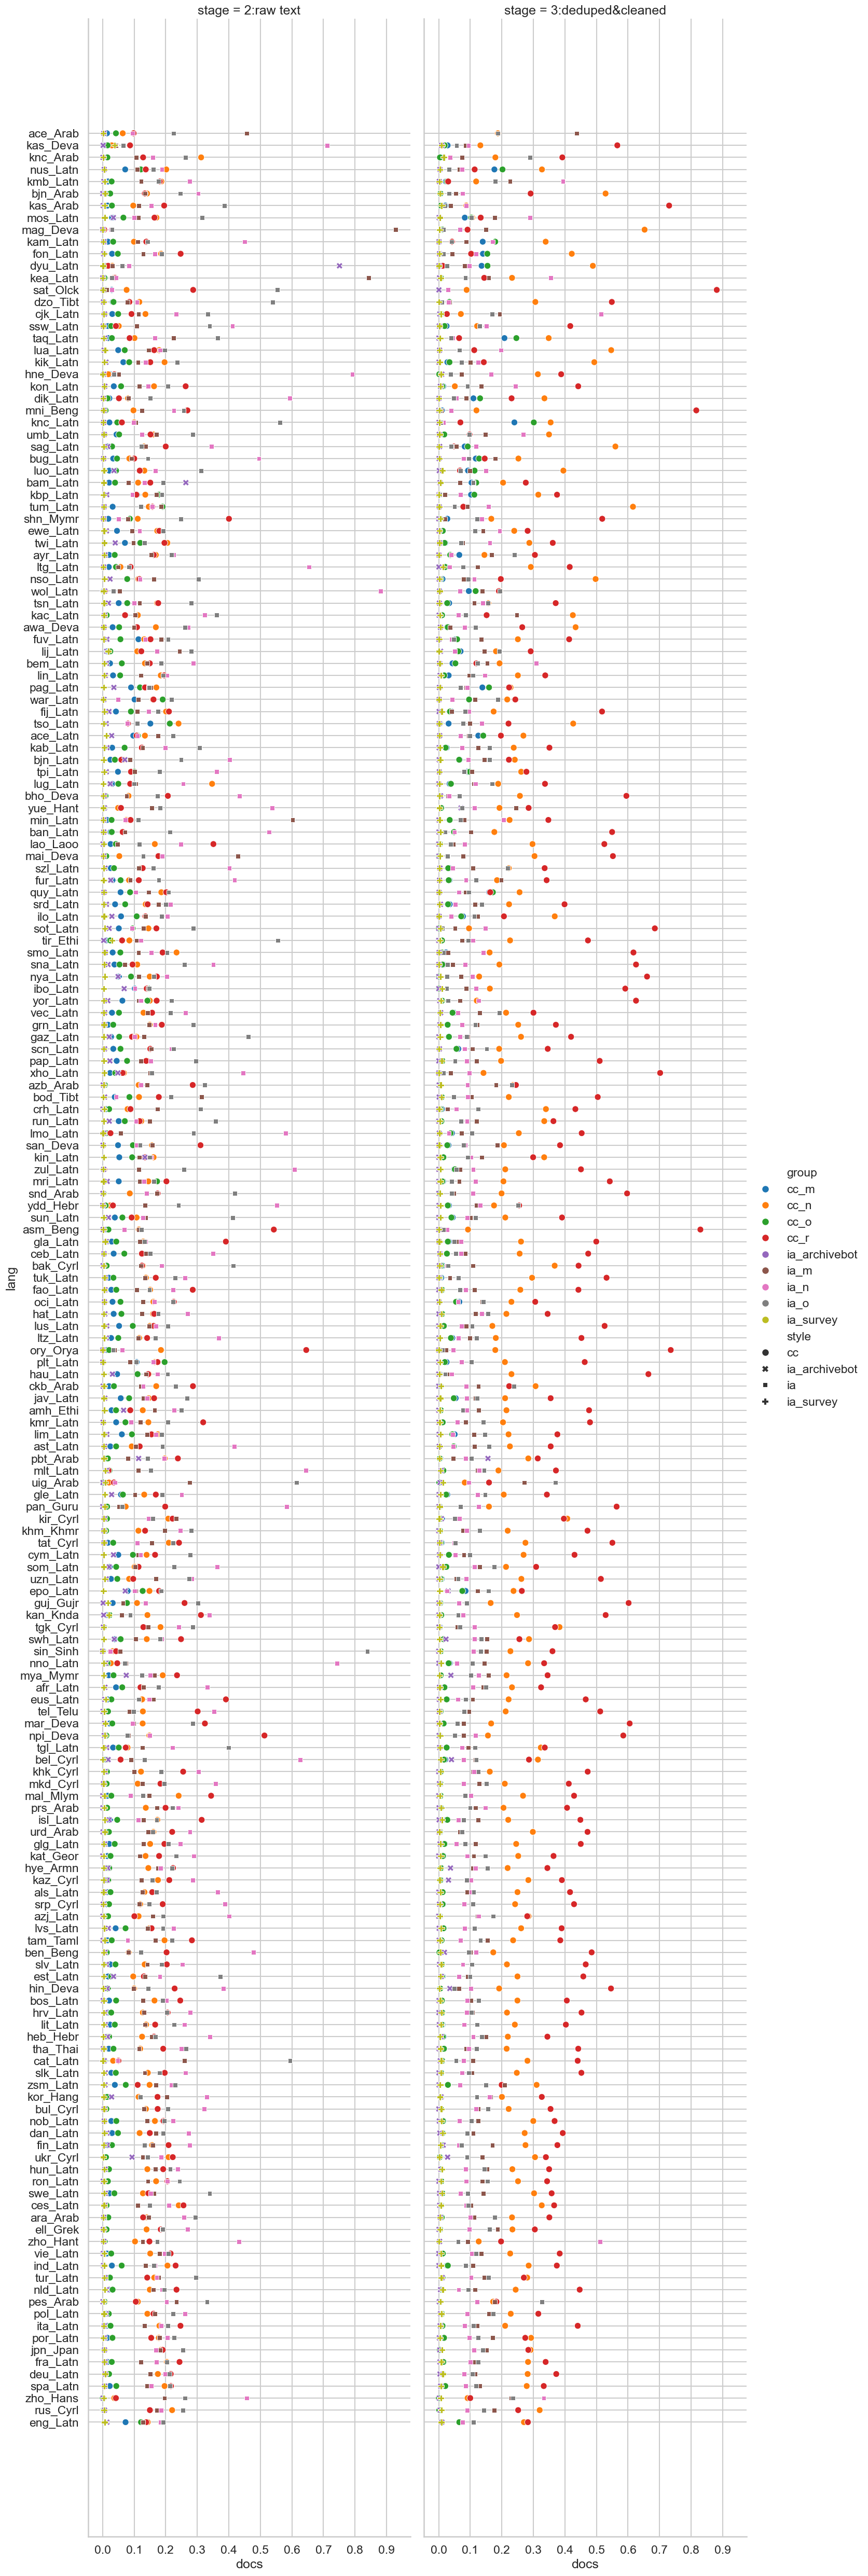

In [53]:

g = sns.relplot(data=pdf, y='lang', x='docs', hue='group', kind='scatter', 
                style='style', col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.savefig('plots/group-contribs-perlang-docs.pdf')

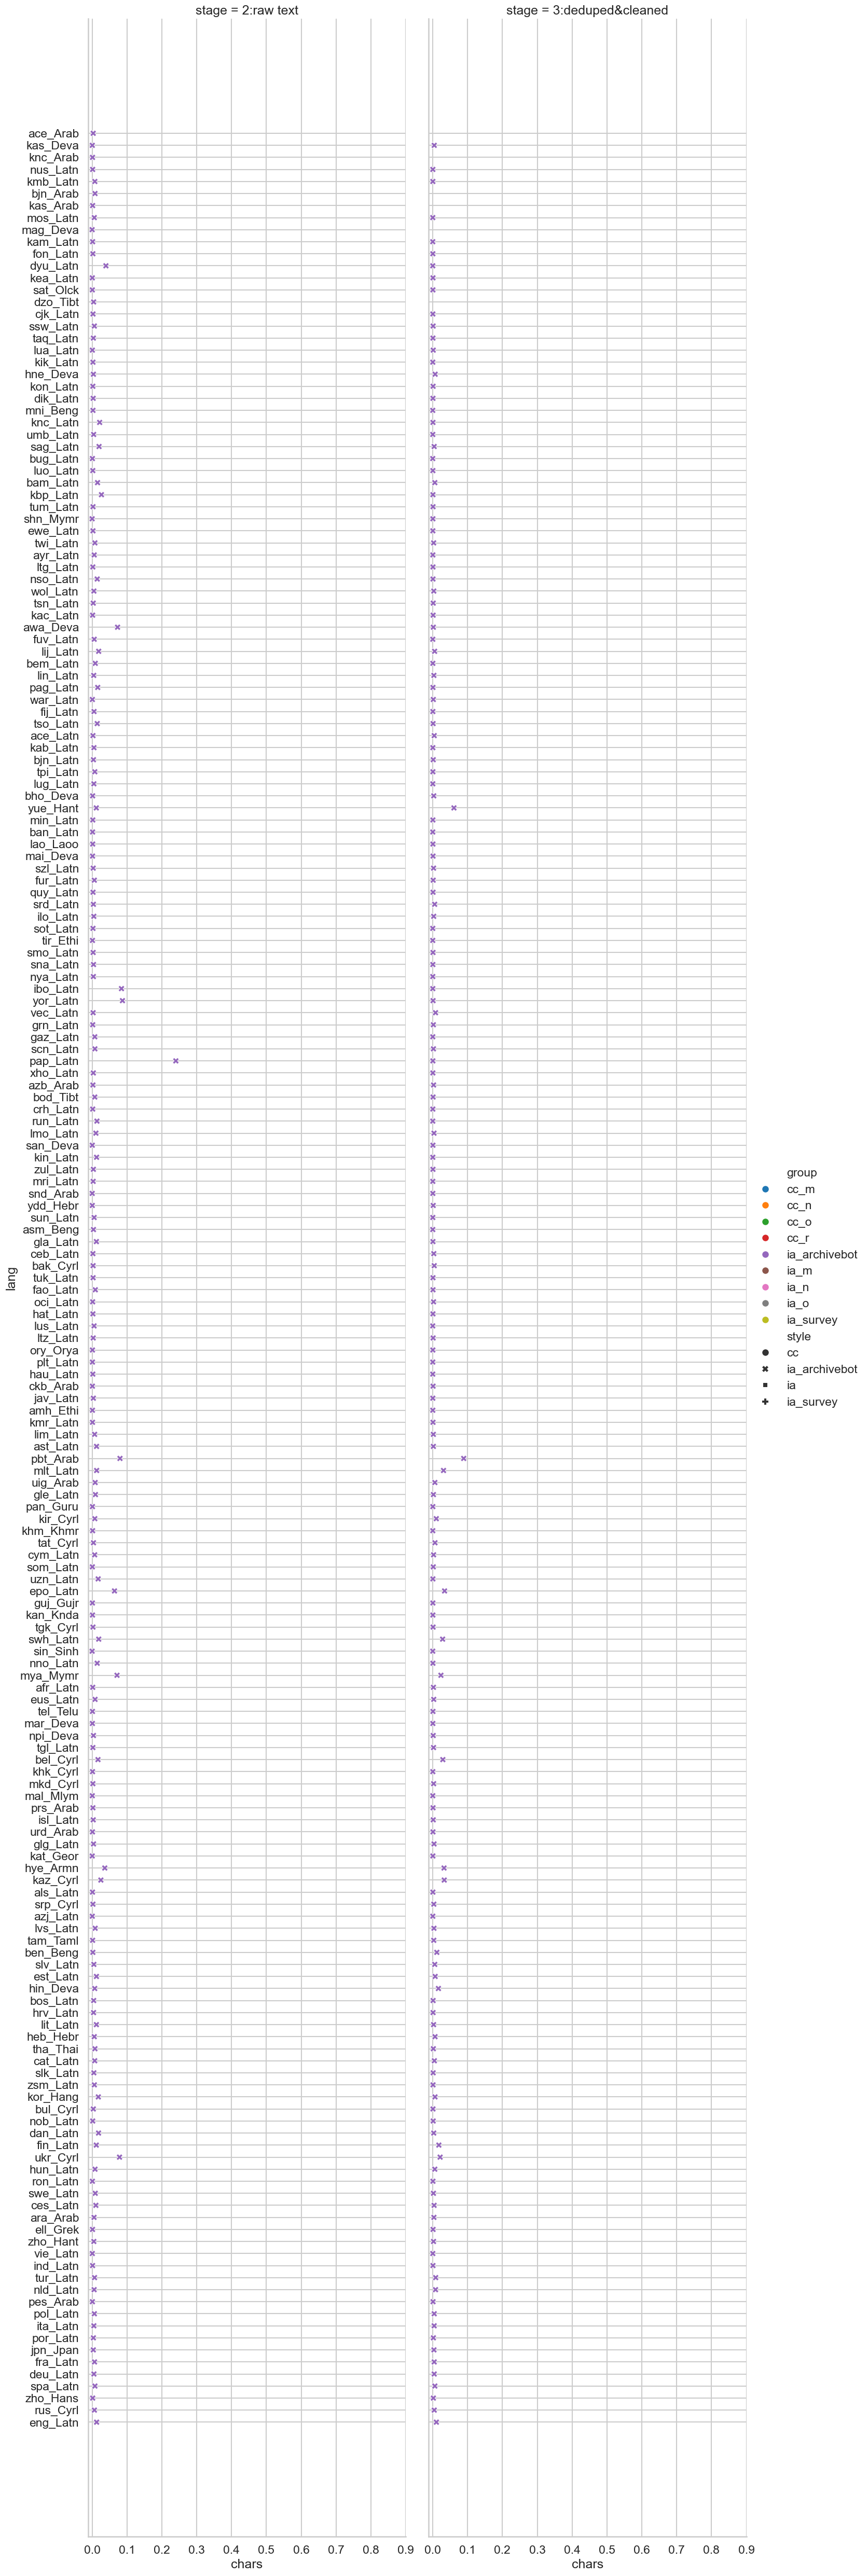

In [54]:
# which languages a large proportion of characters comes from archive bot?
g = sns.relplot(data=pdf[pdf['group'].str.startswith('ia_arch')], y='lang', x='chars', hue='group', kind='scatter', 
                style='style', hue_order=pdf['group'].unique(), style_order=pdf['style'].unique(), col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])

We have 7% of ArchiveBot, can increase by 15x. This will give 
+10% * (15-1) = +140% of pbt_Arab, 
+3-5% * (15-1) = +40-70% for ~10 other languages,
much less for most languages.

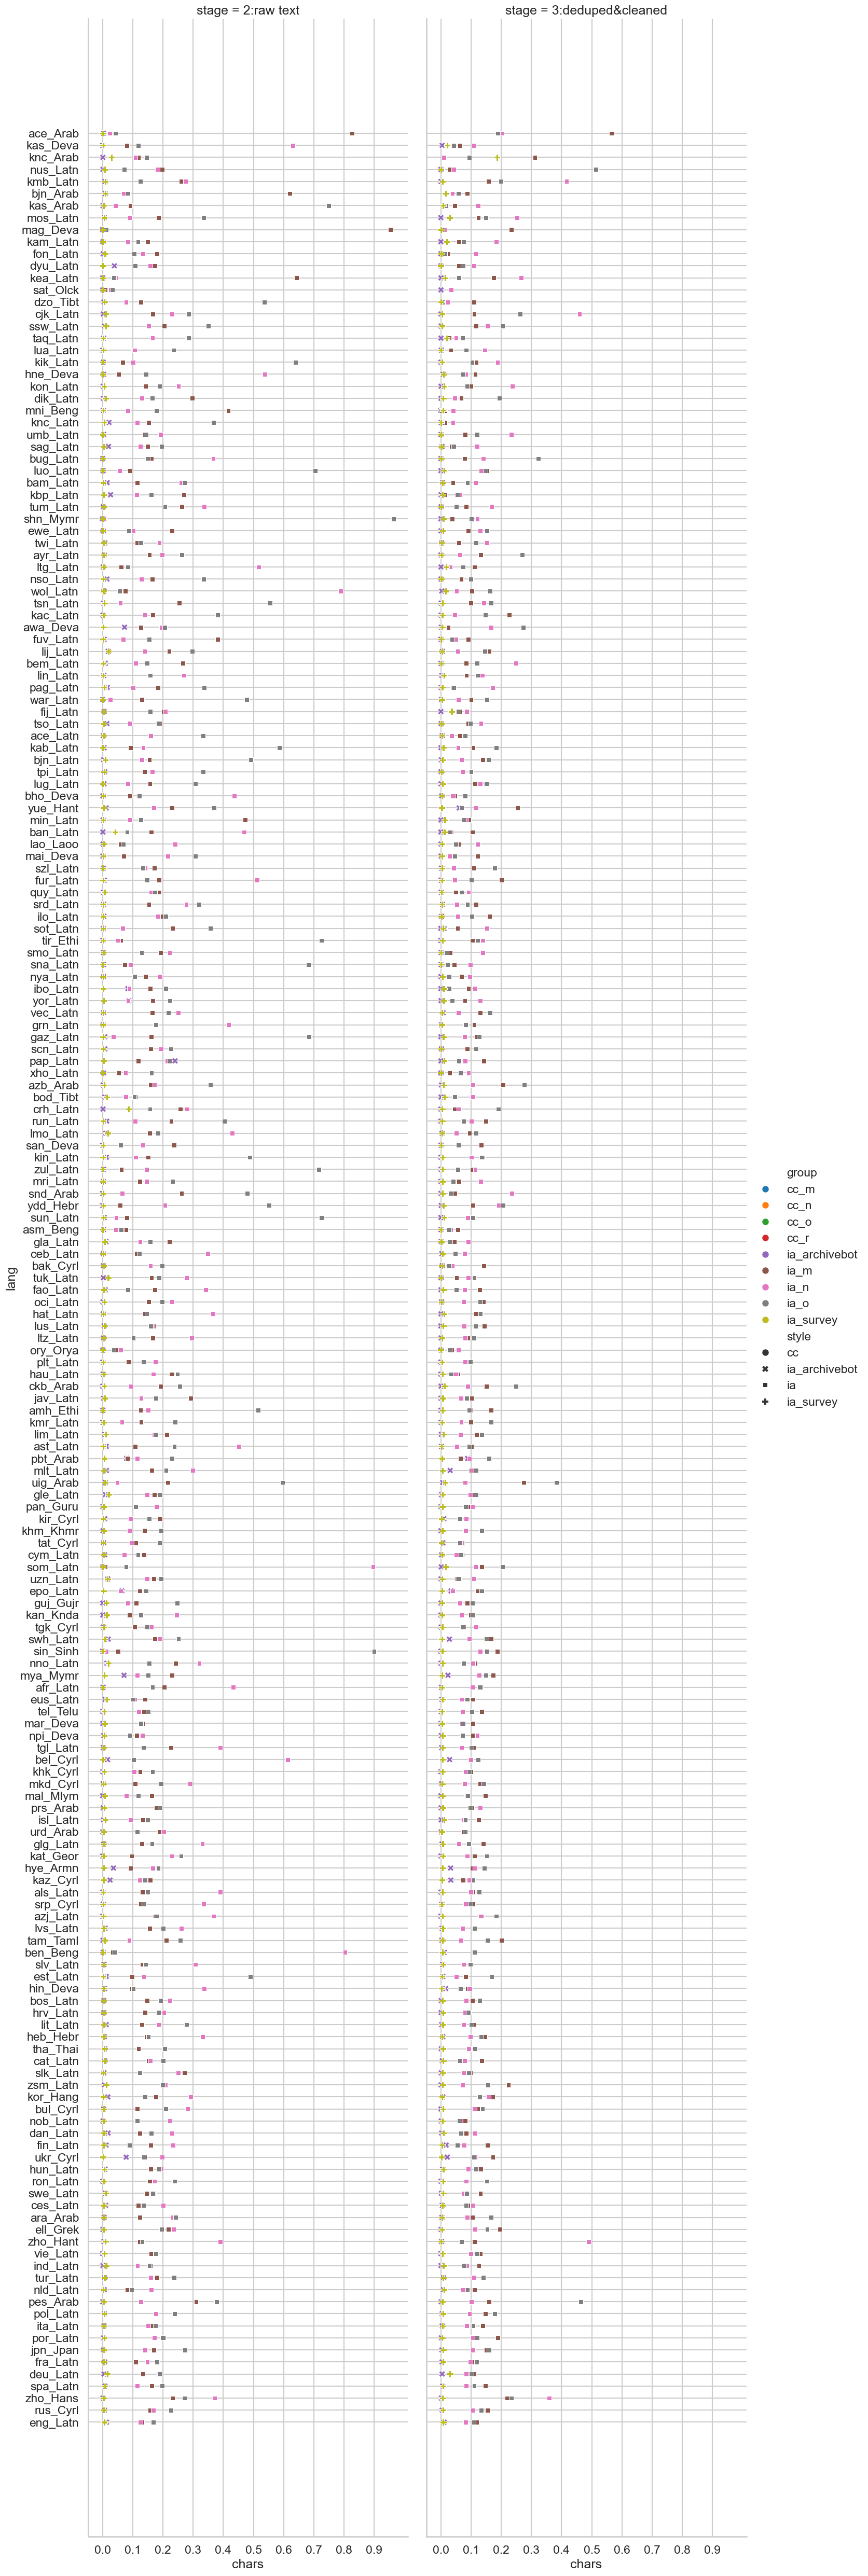

In [55]:
# which languages a large proportion of characters comes from IA crawls?
g = sns.relplot(data=pdf[pdf['group'].str.startswith('ia_')], y='lang', x='chars', hue='group', kind='scatter', 
                style='style', hue_order=pdf['group'].unique(), style_order=pdf['style'].unique(), col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.savefig('plots/group-contribs-perlang-chars-iaonly.pdf')

# Yields

In [56]:
group_sizes

group
cc_m               64144
cc_n              264703
cc_o               99941
cc_r              358759
ia_archivebot     271000
ia_m              807000
ia_n             1409000
ia_o             1080000
ia_survey          94000
Name: GB, dtype: int64

In [57]:
gdf = mdf.reset_index().groupby(['stage','group']).sum(numeric_only=True)
gdf

segments       wcwords         chars  \
stage             group                                                     
2:raw text        cc_m           8.059934e+10  1.076941e+12  6.608505e+12   
                  cc_n           2.932451e+11  3.656854e+12  2.412044e+13   
                  cc_o           1.335752e+11  1.861995e+12  1.144725e+13   
                  cc_r           2.760924e+11  3.996673e+12  2.833005e+13   
                  ia_archivebot  1.639818e+10  2.106876e+11  1.373769e+12   
                  ia_m           3.904105e+11  3.118744e+12  2.134821e+13   
                  ia_n           5.154552e+11  3.323772e+12  2.439048e+13   
                  ia_o           5.079840e+11  3.939335e+12  2.758546e+13   
                  ia_survey      8.507346e+09  1.220928e+11  9.015846e+11   
3:deduped&cleaned cc_m           1.019011e+10  2.282441e+11  1.381445e+12   
                  cc_n           6.742982e+10  1.421906e+12  9.280560e+12   
                  cc_o           9.978533e+09  2.193625e+11  1.322949e+12   
                  cc_r           7.575680e+10  1.690989e+12  1.104197e+13   
                  ia_archivebot  2.089877e+09  4.180026e+10  2.626273e+11   
                  ia_m           4.602769e+10  7.233028e+11  5.022563e+12   
                  ia_n           3.905196e+10  5.092599e+11  4.089744e+12   
                  ia_o           4.761364e+10  6.728910e+11  4.720193e+12   
                  ia_survey      2.162595e+09  4.778321e+10  3.157517e+11   

                                         docs  
stage             group                        
2:raw text        cc_m           3.888278e+09  
                  cc_n           1.333527e+10  
                  cc_o           6.636961e+09  
                  cc_r           1.319533e+10  
                  ia_archivebot  1.071835e+09  
                  ia_m           1.557672e+10  
                  ia_n           2.761638e+10  
                  ia_o           2.421038e+10  
                  ia_survey      6.466359e+08  
3:deduped&cleaned cc_m           3.422434e+08  
                  cc_n           2.633933e+09  
                  cc_o           3.367497e+08  
                  cc_r           2.956053e+09  
                  ia_archivebot  6.982054e+07  
                  ia_m           1.461174e+09  
                  ia_n           1.267311e+09  
                  ia_o           1.406076e+09  
                  ia_survey      8.554419e+07

In [58]:
pdf = gdf.groupby('stage').transform(lambda r: r/group_sizes)
pdf

segments       wcwords         chars  \
stage             group                                                     
2:raw text        cc_m           1.256537e+06  1.678943e+07  1.030261e+08   
                  cc_n           1.107827e+06  1.381493e+07  9.112266e+07   
                  cc_o           1.336540e+06  1.863094e+07  1.145401e+08   
                  cc_r           7.695761e+05  1.114027e+07  7.896680e+07   
                  ia_archivebot  6.050990e+04  7.774450e+05  5.069259e+06   
                  ia_m           4.837800e+05  3.864614e+06  2.645379e+07   
                  ia_n           3.658306e+05  2.358958e+06  1.731049e+07   
                  ia_o           4.703556e+05  3.647532e+06  2.554209e+07   
                  ia_survey      9.050368e+04  1.298860e+06  9.591326e+06   
3:deduped&cleaned cc_m           1.588630e+05  3.558308e+06  2.153663e+07   
                  cc_n           2.547376e+05  5.371704e+06  3.506027e+07   
                  cc_o           9.984424e+04  2.194920e+06  1.323730e+07   
                  cc_r           2.111635e+05  4.713440e+06  3.077825e+07   
                  ia_archivebot  7.711724e+03  1.542445e+05  9.691044e+05   
                  ia_m           5.703555e+04  8.962860e+05  6.223746e+06   
                  ia_n           2.771608e+04  3.614336e+05  2.902586e+06   
                  ia_o           4.408670e+04  6.230472e+05  4.370549e+06   
                  ia_survey      2.300633e+04  5.083320e+05  3.359061e+06   

                                         docs  
stage             group                        
2:raw text        cc_m           60617.949380  
                  cc_n           50378.219117  
                  cc_o           66408.791467  
                  cc_r           36780.493763  
                  ia_archivebot   3955.109590  
                  ia_m           19302.005144  
                  ia_n           19599.982983  
                  ia_o           22417.014761  
                  ia_survey       6879.105340  
3:deduped&cleaned cc_m            5335.548485  
                  cc_n            9950.523379  
                  cc_o            3369.485126  
                  cc_r            8239.660948  
                  ia_archivebot    257.640354  
                  ia_m            1810.624680  
                  ia_n             899.440138  
                  ia_o            1301.921999  
                  ia_survey        910.044606

In [59]:
pdf = pdf.reset_index().melt(id_vars=['stage','group'], value_vars=['chars','docs'], 
                             var_name='quantity',value_name='yield')

Text(0.5, 0.98, 'Chars/docs of extracted text per 1 GB of raw compressed crawls')

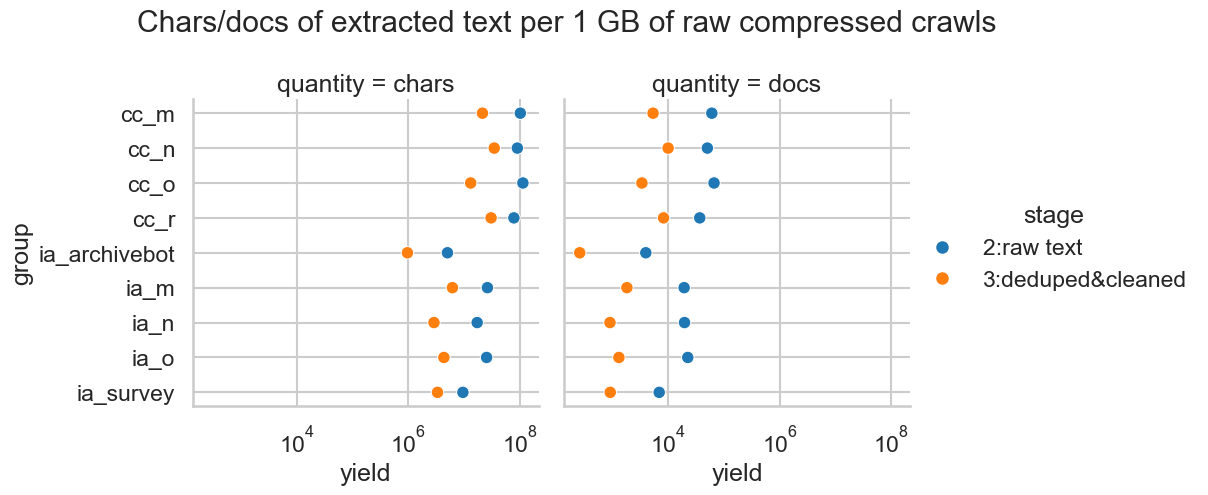

In [60]:
g = sns.relplot(data=pdf, y='group', x='yield', hue='stage', col='quantity')
g.set(xscale='log')

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Chars/docs of extracted text per 1 GB of raw compressed crawls')

In [ ]:
sns.set_context('talk')
g = sns.relplot(data=pdf, y='group', x='yield', hue='stage', col='quantity',facet_kws={'sharex':False},
               aspect=1.3, legend=True)
g.set(xscale='log')
g.set(xticks=[2**i for i in range(8,30)], xticklabels=[f'$2^{{{i}}}$' if i%2==0 else '' for i in range(8,30)])
g.fig.subplots_adjust(top=0.8)
g.set(ylabel=None)
# g.fig.suptitle('Chars/docs of extracted text per 1 GB of raw compressed crawls')

# Set individual x-axis limits for each subplot
g.set(xlim=(0, 60))  # Set a common limit first (optional)
g.axes[0, 0].set_xlim(2**19, 2**28)  # Set x limits for the first subplot
g.axes[0, 1].set_xlim(2**7, 2**17)  # Set x limits for the second subplot
# sns.move_legend(g,'lower center', bbox_to_anchor=(0.5,0.99))
# g.legend.get_frame().set_visible(True)
g.savefig('plots/group-yields.pdf')

In [ ]:
g=sns.relplot(data=pdf.query('quantity=="chars"'), y='group', x='yield', hue='stage', 
               aspect=1.5)
g.set(xscale='log')
g.set(xticks=[2**i for i in range(19,28)], xticklabels=[f'$2^{{{i}}}$' for i in range(19,28)])
g.fig.subplots_adjust(top=0.8)
g.set(ylabel=None)

sns.move_legend(g,'upper center', bbox_to_anchor=(0.5,1.05))
# g.legend.get_frame().set_visible(True)
g.savefig('paper/group-yields.pdf')

In [ ]:
pdf

In [ ]:
wdf = load_crawl_sizes()
wdf

### Yields for each language

In [ ]:
gdf = mdf.reset_index().groupby(['stage','group','lang']).sum(numeric_only=True)
gdf

In [ ]:
sns.set_context('notebook')

import math
base=2
for quantity in ('docs', 'chars'):
    pdf = gdf.groupby(['stage','lang']).transform(lambda r: r/group_sizes)
    pdf = pdf.reset_index().melt(id_vars=['stage','group','lang'], value_vars=[quantity], 
                                 var_name='quantity',value_name='yield')
    pdf = pdf.set_index('lang').loc[langs_sorted].reset_index()
    pdf['crawl_type'] = pdf.group.str.split('_').str[0]
    max_pow = int(math.log(pdf['yield'].max(), base)+1)
    min_pow = int(math.log(pdf[pdf['yield'] > 0]['yield'].min(), base))
    print(min_pow, max_pow)
    
    g = sns.relplot(data=pdf[pdf.quantity==quantity], 
                    y='lang', x='yield', hue='group', col='stage', style='crawl_type',
                   height=35, aspect=0.2)
    g.set(xscale='log')
    g.set(xticks=[base**i for i in range(min_pow, max_pow)], 
          xticklabels=[f'${base}^{{{i}}}$' if i%2 else '' for i in range(min_pow, max_pow)])
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{quantity} of extracted text per 1 GB of raw compressed crawls')
    g.savefig(f'plots/group-yields-perlang-{quantity}.pdf')

In [ ]:
pdf

# Prediction for it3

In [ ]:
new_group_sizes = group_sizes.copy()
new_group_sizes

In [ ]:
new_group_sizes.loc[new_group_sizes.index.str.startswith('cc')] *= 2.5  # +15 random CC crawls to the previous 10
new_group_sizes

In [ ]:
add_group_sizes = pd.Series({
    'ia_archivebot':5.0*10**6, 
    'cc_r':2.0*10**6
})

In [ ]:
new_group_sizes.loc[add_group_sizes.index] += add_group_sizes
new_group_sizes

In [ ]:
sns.set_context('notebook')

import math
base=2
for quantity in ('docs', 'chars'):
    pdf = gdf.groupby(['stage','lang']).transform(lambda r: r/group_sizes*new_group_sizes)
    pdf = pdf.reset_index().melt(id_vars=['stage','group','lang'], value_vars=[quantity], 
                                 var_name='quantity',value_name='yield')
    pdf = pdf.set_index('lang').loc[langs_sorted].reset_index()
    pdf['crawl_type'] = pdf.group.str.split('_').str[0]
    max_pow = int(math.log(pdf['yield'].max(), base)+1)
    min_pow = int(math.log(pdf[pdf['yield'] > 0]['yield'].min(), base))
    print(min_pow, max_pow)
    
    g = sns.relplot(data=pdf[pdf.quantity==quantity], 
                    y='lang', x='yield', hue='group', col='stage', style='crawl_type',
                   height=35, aspect=0.2)
    g.set(xscale='log')
    g.set(xticks=[base**i for i in range(min_pow, max_pow)], 
          xticklabels=[f'${base}^{{{i}}}$' if i%2 else '' for i in range(min_pow, max_pow)])
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{quantity} of extracted text')
    g.savefig(f'plots/it3-pred-perlang-{quantity}.pdf')

In [ ]:
pdf

### For which languages full archivebot can contribute significantly?

In [ ]:
sns.set_context('notebook')

import math
base=2
for quantity in ('docs', 'chars'):
    pdf = gdf.groupby(['stage','lang']).transform(lambda r: r/group_sizes*new_group_sizes)
    pdf = pdf.reset_index().melt(id_vars=['stage','group','lang'], value_vars=[quantity], 
                                 var_name='quantity',value_name='yield')
    pdf = pdf.set_index('lang').loc[langs_sorted].reset_index()
    pdf['crawl_type'] = pdf.group.str.split('_').str[0]

    pdf['prop-per-lang'] = pdf.groupby(['stage','lang'])['yield'].transform(lambda q: q/q.sum())
    langs = pdf[(pdf.group=='ia_archivebot')&(pdf['prop-per-lang']>0.2)].lang.unique()    
    pdf = pdf[pdf.lang.isin(langs)]
    
#     max_pow = int(math.log(pdf['yield'].max(), base)+1)
#     min_pow = int(math.log(pdf[pdf['yield'] > 0]['yield'].min(), base))
#     print(min_pow, max_pow)
    
    g = sns.relplot(data=pdf[pdf.quantity==quantity], 
                    y='lang', x='prop-per-lang', hue='group', col='stage', style='crawl_type',
                   height=35, aspect=0.2)
#     g.set(xscale='log')
#     g.set(xticks=[base**i for i in range(min_pow, max_pow)], 
#           xticklabels=[f'${base}^{{{i}}}$' if i%2 else '' for i in range(min_pow, max_pow)])
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{quantity} of extracted text')
    g.savefig(f'plots/fullarchivebot-it3-pred-perlang-{quantity}.pdf')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset("car_crashes")


sns.set_style("whitegrid")
sns.displot(kind='scatter',
    data=data,
    x='alcohol',
    y='abbrev',
    size='ins_losses',
    legend=False,
)
plt.margins(0.dd0015, tight=True)
plt.show()
